<center>ĐỒ ÁN THỰC HÀNH #2: PHÂN TÍCH DỮ LIỆU ỨNG DỤNG</center>

| MSSV     | Họ và tên         | Đánh giá |
|----------|-------------------|----------|
| 19120539 | Vương Thế Khang   | 100%     |
| 19120555 | Nguyễn Chánh Kiệt | 100%     |
| 19120652 | Nguyễn Trọng Thái | 100%     |
| 19120699 | Ngô Mậu Trường    | 100%     |

**Link colab:** https://colab.research.google.com/drive/1c7TJLJO5oJf25xKeLCfA23YESS1nvVjq?usp=sharing

## Import

In [1]:
# Imporant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import pydotplus
import warnings
import statsmodels.api as sm

# More libraries
from matplotlib.colors import ListedColormap
from math import sqrt
from six import StringIO
from IPython.display import Image

# Config pandas
pd.set_option('mode.chained_assignment', None)

# Config warning
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)

# Statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

# Sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A. THU THẬP DỮ LIỆU

Bộ dữ liệu mà nhóm sẽ thực hiện trong đồ án lần này là bộ dữ liệu về thông tin các phòng ở, nhà nghỉ, khách sạn, căn hộ, cho phép người dùng đặt và cho thuê tùy theo nhu cầu cá nhân riêng biệt. Dữ liệu được thu thập từ nền tảng đặt và cho thuê phòng [Airbnb](airbnb.com.vn) thuộc sở hữu của công ty Airbnb. Theo như mô tả về dữ liệu như sau:
> Inside Airbnb is an independent, non-commercial set of tools and data that allows you to explore how Airbnb is really being used in cities around the world. By analyzing publicly available information about a city's Airbnb's listings, Inside Airbnb provides filters and key metrics so you can see how Airbnb is being used to compete with the residential housing market.

Ở đây ta có 2 file dữ liệu bao gồm:
- File "AB_NYC_2019.csv": bộ dữ liệu được lấy từ nguồn [Source](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) trên Kaggle ở bài tập DATH#1.
- File "dbo_airbnb-listings.csv": bộ dữ liệu được lấy từ nguồn [Source](https://public.opendatasoft.com/explore/dataset/airbnb-listings/table/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D) và đã được qua xử lý loại bỏ các trường có dữ liệu nặng và không cần thiết, nhằm giảm bớt một phần dung lượng của dữ liệu.

Nói thêm, theo thông tin từ nguồn trên, dữ liệu của Inside Airbnb được lấy từ API có sẵn công khai của Airbnb và đã được phân tích, làm sạch và tổng hợp cho người dùng.

Một số thông tin quan trọng về dữ liệu:
- File "AB_NYC_2019.csv":
  - Công khai bởi: Dgomonov
  - Giấy phép: [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/)
- File "dbo_airbnb-listings.csv":
  - Công khai bởi: Inside Airbnb
  - Giấy phép: [CC0 1.0 Universal (CC0 1.0) Public Domain Dedication](https://creativecommons.org/publicdomain/zero/1.0/)

Đầu tiên, ta sẽ xem thử bộ dữ liệu trông như thế nào. Đọc dữ liệu từ file "AB_NYC_2019.csv" và "listings.csv" và lưu vào 2 dataframe `df1` và `df2`.

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')
df1.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/dbo_airbnb-listings.csv')
df2.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ID     Scrape ID Last Scraped  \
0  17619081.0  2.017062e+13    6/15/2017   
1  13356620.0  2.017062e+13    6/15/2017   
2  18993602.0  2.017062e+13    6/15/2017   
3   4313438.0  2.017062e+13    6/15/2017   
4   9029859.0  2.017062e+13    6/15/2017   

                                               Name Experiences Offered  \
0        Nice smallroom i central old Frederiksberg                none   
1    Spacious 95 m2 3 room apt. with great location                none   
2  Bright and lovely 3 room apartment in Copenhagen                none   
3                      CHAMERENDE FAMILIE LEJLIGHED                none   
4                 Room in Frederiksberg - Free wifi                none   

    Host ID Host Name Host Since  \
0  39150424  Birgitte  7/21/2015   
1  75748444   Torsten   6/4/2016   
2  11008595    Amalie   1/4/2014   
3   9273916     Mette  10/7/2013   
4  45996316     Hasse  10/7/2015   

                                       Host Location Host Response Time  ...  \
0  Frederiksberg, Capital Region of Denmark, Denmark     within an hour  ...   
1  Frederiksberg, Capital Region of Denmark, Denmark                NaN  ...   
2     Copenhagen, Capital Region of Denmark, Denmark     within an hour  ...   
3  Frederiksberg, Capital Region of Denmark, Denmark                NaN  ...   
4     Copenhagen, Capital Region of Denmark, Denmark                NaN  ...   

   Review Scores Checkin Review Scores Communication Review Scores Location  \
0                   10.0                        10.0                    8.0   
1                   10.0                        10.0                   10.0   
2                    NaN                         NaN                    NaN   
3                    NaN                         NaN                    NaN   
4                   10.0                        10.0                   10.0   

   Review Scores Value  License Jurisdiction Names Cancellation Policy  \
0                 10.0      NaN                NaN            flexible   
1                  9.0      NaN                NaN              strict   
2                  NaN      NaN                NaN            moderate   
3                  NaN      NaN                NaN            flexible   
4                  9.0      NaN                NaN            flexible   

  Calculated host listings count Reviews per Month  \
0                            2.0              0.66   
1                            1.0              0.41   
2                            2.0               NaN   
3                            1.0               NaN   
4                            1.0              0.15   

                            Geolocation  
0  55.67597935514723,12.532959778704614  
1   55.6759094982106,12.534325864665762  
2  55.691447262778574,12.53283111135349  
3  55.68292450375927,12.536564981736335  
4   55.68396572265812,12.55302948723742  

[5 rows x 67 columns]

# B. KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

## Khám phá dữ liệu `df1`

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
df1.shape

(48895, 16)

Vậy dữ liệu có kích thước **48895 dòng x 16 cột**

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một căn phòng được người dùng đặt hoặc cho thuê, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [6]:
have_duplicated_row = all(df1.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

## Khám phá dữ liệu `df2`

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [7]:
df2.shape

(494954, 67)

Vậy dữ liệu có kích thước **494954 dòng x 67 cột**

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một căn phòng được người dùng đặt hoặc cho thuê, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [8]:
have_duplicated_row = all(df2.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

---

**Tiền xử lý dữ liệu:** Gộp 2 tập dữ liệu trên thành 1

Thay đổi định dạng tên cột của tập dữ liệu `df2` cho giống với tên cột của tập dữ liệu `df1`.

In [9]:
df2.columns = df2.columns.str.replace(' ', '_').str.lower()

Sau đó loại bỏ những cột không xuất hiện ở cả 2 tập dữ liệu.

In [10]:
columns = list(set(df1.columns) & set(df2.columns))
columns.sort()
df1 = df1[columns]
df2 = df2[columns]

Cuối cùng, gộp 2 tập dữ liệu `df1` và `df2` thành một tập dữ liệu mới đặt tên là `airbnb_df`.

In [11]:
airbnb_df = pd.concat([df1, df2])
airbnb_df.head()

availability_365  calculated_host_listings_count  host_id    host_name  \
0             365.0                             6.0     2787         John   
1             355.0                             2.0     2845     Jennifer   
2             365.0                             1.0     4632    Elisabeth   
3             194.0                             1.0     4869  LisaRoxanne   
4               0.0                             1.0     7192        Laura   

       id last_review  latitude  longitude  minimum_nights  \
0  2539.0  2018-10-19  40.64749  -73.97237             1.0   
1  2595.0  2019-05-21  40.75362  -73.98377             1.0   
2  3647.0         NaN  40.80902  -73.94190             3.0   
3  3831.0  2019-07-05  40.68514  -73.95976             1.0   
4  5022.0  2018-11-19  40.79851  -73.94399            10.0   

                                               name neighbourhood  \
0                Clean & quiet apt home by the park    Kensington   
1                             Skylit Midtown Castle       Midtown   
2               THE VILLAGE OF HARLEM....NEW YORK !        Harlem   
3                   Cozy Entire Floor of Brownstone  Clinton Hill   
4  Entire Apt: Spacious Studio/Loft by central park   East Harlem   

   number_of_reviews  price  reviews_per_month        room_type  
0                9.0  149.0               0.21     Private room  
1               45.0  225.0               0.38  Entire home/apt  
2                0.0  150.0                NaN     Private room  
3              270.0   89.0               4.64  Entire home/apt  
4                9.0   80.0               0.10  Entire home/apt

---

## Khám phá dữ liệu mới

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [12]:
airbnb_df.shape

(543849, 15)

Vậy dữ liệu có kích thước **543849 dòng x 15 cột**

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin về một căn phòng được người dùng đặt hoặc cho thuê, có vẻ như không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

Kiểm tra xem dữ liệu có các dòng bị lặp không và lưu kết quả vào biến `have_duplicated_row`. Biến này sẽ có giá trị True nếu dữ liệu có các dòng bị lặp và có giá trị False nếu ngược lại.

In [13]:
have_duplicated_row = all(airbnb_df.duplicated())
have_duplicated_row

False

Như vậy, không có dòng nào bị lặp lại.

### Có cột nào bị thiếu dữ liệu không?

Với mỗi cột có trong tập dữ liệu, ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100) và số lượng giá trị thiếu. Sau đó ta sẽ lưu 2 giá trị này vào dataframe `missing_values_df` thành 2 dòng là "num_missing_values" và "ratio_missing_values".

In [14]:
def num_missing_values(col):
  return col.isnull().sum()
def ratio_missing_values(col):
  return col.isna().mean()*100

missing_values_df = airbnb_df.agg([num_missing_values, ratio_missing_values]).T
missing_values_df['num_missing_values'] = missing_values_df['num_missing_values'].astype(int)
missing_values_df

num_missing_values  ratio_missing_values
availability_365                                 2              0.000368
calculated_host_listings_count                 867              0.159419
host_id                                          0              0.000000
host_name                                      525              0.096534
id                                               1              0.000184
last_review                                 131951             24.262433
latitude                                         1              0.000184
longitude                                        1              0.000184
minimum_nights                                   2              0.000368
name                                           434              0.079802
neighbourhood                               149551             27.498626
number_of_reviews                                2              0.000368
price                                         7958              1.463274
reviews_per_month                           132059             24.282292
room_type                                        1              0.000184

Như vậy có thể thấy đa phần các cột trong tập dữ liệu mới `airbnb_df` đều xuất hiện giá trị bị thiếu (NaN), ngoại trừ cột "host_id". 

Cách xử lý missing value:
- Cột "availability_365", "id", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews" chiếm tỉ lệ phần trăm missing value thấp nên ít ảnh hưởng nhiều. Vì vậy, ta có thể bỏ qua xử lý missing value.
- Cột "name", "host_name", "calculated_host_listings_count". Ta sẽ thay bằng giá trị xuất hiện nhiều nhất (mode).
- Cột "neighbourhood" và "reviews_per_month" chiếm tỉ lệ phần trăm missing value cao nên sẽ có xuất hiện nhiều outlier. Vì vậy, ta sẽ thay bằng giá trị xuất hiện nhiều nhất (mode).
- Cột "last review". Ta sẽ thay bằng giá trị lớn nhất (max) hay là ngày gần nhất.

Ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

---

**Tiền xử lý dữ liệu:** Xử lý missing values

Bỏ đi các dòng có chứa giá trị NaN ở các cột "availability_365", "id", "latitude", "longitude", "room_type", "minimum_nights", "number_of_reviews".

In [15]:
airbnb_df = airbnb_df.dropna(subset=['availability_365', 'id', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews'])

Thay thế giá trị NaN của cột "name", "host_name", "calculated_host_listings_count" bằng giá trị xuất hiện nhiều nhất (mode).

In [16]:
airbnb_df['name'] = airbnb_df['name'].fillna(airbnb_df['name'].mode()[0])
airbnb_df['host_name'] = airbnb_df['host_name'].fillna(airbnb_df['host_name'].mode()[0])
airbnb_df['calculated_host_listings_count'] = airbnb_df['calculated_host_listings_count'].fillna(airbnb_df['calculated_host_listings_count'].mode()[0])

Thay thế giá trị NaN của cột "neighbourhood" và "review_per_month" bằng giá trị xuất hiện nhiều nhất (mode).

In [17]:
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].fillna(airbnb_df['neighbourhood'].mode()[0])
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(airbnb_df['reviews_per_month'].mode()[0])

Thay thế giá trị NaN của cột "last_review" bằng giá trị lớn nhất (max). Nhưng trước tiên, ta cần thay đổi kiểu dữ liệu của cột "last_review" sang kiểu dữ liệu dạng `datetime`.

In [18]:
airbnb_df['last_review'] = airbnb_df['last_review'].astype('datetime64')
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(airbnb_df['last_review'].max())

Xem thử thông tin của các cột dữ liệu sau khi tiền xử lý.

In [19]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543847 entries, 0 to 494953
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   availability_365                543847 non-null  float64       
 1   calculated_host_listings_count  543847 non-null  float64       
 2   host_id                         543847 non-null  int64         
 3   host_name                       543847 non-null  object        
 4   id                              543847 non-null  float64       
 5   last_review                     543847 non-null  datetime64[ns]
 6   latitude                        543847 non-null  float64       
 7   longitude                       543847 non-null  float64       
 8   minimum_nights                  543847 non-null  float64       
 9   name                            543847 non-null  object        
 10  neighbourhood                   543847 non-null  object 

Các cột đều đã điền đầy đủ missing values ngoại trừ cột "price", ta sẽ xử lý missing values cho cột "price" ở phần sau.

---

### Mỗi cột hiện đang có kiểu dữ liệu gì?

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [20]:
def dtype(col):
  dtypes = set()
  dtypes |= set(col.apply(lambda x: type(x)))
  return dtypes
airbnb_df.agg([dtype]).T

dtype
availability_365                                                {<class 'float'>}
calculated_host_listings_count                                  {<class 'float'>}
host_id                                                           {<class 'int'>}
host_name                                                         {<class 'str'>}
id                                                              {<class 'float'>}
last_review                     {<class 'pandas._libs.tslibs.timestamps.Timest...
latitude                                                        {<class 'float'>}
longitude                                                       {<class 'float'>}
minimum_nights                                                  {<class 'float'>}
name                                                              {<class 'str'>}
neighbourhood                                                     {<class 'str'>}
number_of_reviews                                               {<class 'float'>}
price                                                           {<class 'float'>}
reviews_per_month                                               {<class 'float'>}
room_type                                                         {<class 'str'>}

Như vậy có thể thấy:
- Cột "id", "number_of_reviews", "calculated_host_listings_count" và "minimum_nights" đang có kiểu dữ liệu `float`. Ta cần đưa cột này về dạng `int`.

Ta sẽ làm điều này ở bước tiền xử lý dữ liệu.

---

**Tiền xử lý dữ liệu:** Thay đổi kiểu dữ liệu phù hợp

Thay đổi kiểu dữ liệu của cột "id", "number_of_reviews", "calculated_host_listings_count" và "minimum_nights" sang kiểu dữ liệu dạng `int`.

In [21]:
airbnb_df['id'] = airbnb_df['id'].astype(int)
airbnb_df['number_of_reviews'] = airbnb_df['number_of_reviews'].astype(int)
airbnb_df['calculated_host_listings_count'] = airbnb_df['calculated_host_listings_count'].astype(int)
airbnb_df['minimum_nights'] = airbnb_df['minimum_nights'].astype(int)

Xem thử kiểu dữ liệu của các cột dữ liệu sau khi tiền xử lý.

In [22]:
airbnb_df.dtypes

availability_365                         float64
calculated_host_listings_count             int64
host_id                                    int64
host_name                                 object
id                                         int64
last_review                       datetime64[ns]
latitude                                 float64
longitude                                float64
minimum_nights                             int64
name                                      object
neighbourhood                             object
number_of_reviews                          int64
price                                    float64
reviews_per_month                        float64
room_type                                 object
dtype: object

Có vẻ các cột đều có kiểu dữ liệu phù hợp. Nếu trong quá trình phân tích dữ liệu cần phải thay đổi kiểu dữ liệu của các cột thì ta sẽ quay lại tiền xử lý ở đây, tạm thời ta chấp nhận kiểu dữ liệu hiện tại của các cột.

---

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Có 9 cột numerical là "availability_365", "calculated_host_listings_count", "last_review", "latitude", "longitude", "minimum_nights", "number_of_reviews", "price", "reviews_per_month".

Với mỗi cột numerical, ta sẽ tính số lượng (count), giá trị trung bình (mean), độ lệch chuẩn (std), giá trị nhỏ nhất (min), các giá trị tứ phân vị (Q1, Q2, Q3) và giá trị lớn nhất (max). Sau đó ta sẽ lưu 8 giá trị này vào dataframe `numerical_col_df` thành 8 dòng là "count", "mean", "std", "Q1", "Q2", "Q3", "min", "max".

In [23]:
def count(col):
  return col.count()
def mean(col):
  return col.mean()
def std(col):
  return col.std()
def Q1(col):
  return col.quantile(0.25)
def Q2(col):
  return col.quantile(0.5)
def Q3(col):
  return col.quantile(0.75)

numerical_columns = ['availability_365', 'calculated_host_listings_count', 'last_review', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'price', 'reviews_per_month']
numerical_col_df = airbnb_df[numerical_columns].agg([count, mean, std, min, Q1, Q2, Q3, max]).T
numerical_col_df['count'] = numerical_col_df['count'].astype(int)
numerical_col_df

count                           mean  \
availability_365                543847                     161.299364   
calculated_host_listings_count  543847                       6.884986   
last_review                     543847  2017-08-17 04:51:17.727374848   
latitude                        543847                      38.283908   
longitude                       543847                     -20.319308   
minimum_nights                  543847                       3.790439   
number_of_reviews               543847                       17.32826   
price                           535890                     139.409437   
reviews_per_month               543847                       1.355493   

                                                        std  \
availability_365                                 140.564165   
calculated_host_listings_count                    41.213588   
last_review                     477 days 16:01:14.305508944   
latitude                                          21.899315   
longitude                                         69.211012   
minimum_nights                                    85.510611   
number_of_reviews                                 33.668701   
price                                            160.116429   
reviews_per_month                                  1.516551   

                                                min                   Q1  \
availability_365                                0.0                  9.0   
calculated_host_listings_count                  1.0                  1.0   
last_review                     2009-01-21 00:00:00  2016-10-23 00:00:00   
latitude                                    -38.224               39.669   
longitude                                  -123.219            -73.97862   
minimum_nights                                  1.0                  1.0   
number_of_reviews                               0.0                  1.0   
price                                           0.0                 56.0   
reviews_per_month                              0.01                 0.44   

                                                 Q2                   Q3  \
availability_365                              137.0                310.0   
calculated_host_listings_count                  1.0                  2.0   
last_review                     2017-03-27 00:00:00  2019-07-01 00:00:00   
latitude                                      41.88                49.25   
longitude                                    -0.109                6.139   
minimum_nights                                  2.0                  3.0   
number_of_reviews                               4.0                 18.0   
price                                          90.0                150.0   
reviews_per_month                               1.0                 1.54   

                                                max  
availability_365                              365.0  
calculated_host_listings_count                752.0  
last_review                     2019-07-08 00:00:00  
latitude                                     55.995  
longitude                                   153.638  
minimum_nights                              60000.0  
number_of_reviews                             735.0  
price                                       10000.0  
reviews_per_month                             223.0

Hầu hết các giá trị thống kê của các cột dạng số không có gì bất thường. 

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Có 6 cột categorical là "host_id", "id", "host_name", "name", "neighbourhood", "room_type".

Với mỗi cột categorical, ta sẽ tính số lượng các giá trị khác nhau (không xét giá trị NaN) và danh sách các giá trị khác nhau (không xét giá trị NaN). Sau đó ta sẽ lưu 2 giá trị này vào dataframe `categorical_col_df` thành 2 dòng là "ratio_missing_values", "num_diff_values", "diff_values".

In [24]:
def num_diff_values(col):
    return col.nunique()
def diff_values(col):
    return col.dropna().unique()

categorical_columns = ['host_id', 'id', 'host_name', 'name', 'neighbourhood', 'room_type']
categorical_col_df = airbnb_df[categorical_columns].agg([num_diff_values, diff_values]).T
categorical_col_df

num_diff_values  \
host_id                382403   
id                     525869   
host_name               65692   
name                   511675   
neighbourhood            2391   
room_type                   3   

                                                     diff_values  
host_id        [2787, 2845, 4632, 4869, 7192, 7322, 7356, 896...  
id             [2539, 2595, 3647, 3831, 5022, 5099, 5121, 517...  
host_name      [John, Jennifer, Elisabeth, LisaRoxanne, Laura...  
name           [Clean & quiet apt home by the park, Skylit Mi...  
neighbourhood  [Kensington, Midtown, Harlem, Clinton Hill, Ea...  
room_type           [Private room, Entire home/apt, Shared room]

Hầu hết các cột dạng phân loại không có gì bất thường.

# C. PHÂN TÍCH DỮ LIỆU VÀ XÂY DỰNG MÔ HÌNH HỌC MÁY

### Phân tích sự phụ thuộc/tương quan giữa các biến. Biểu diễn sự phụ thuộc bằng scatterplot/heatmap. Nêu nhận xét và kết luận về dữ liệu.

Trước tiên, ta cần phải đưa các biến dạng phân loại (categorical) về dạng số rời rạc (discrete) để có thể tính được độ tương quan và lưu vào biến `correlation_df`.

In [25]:
enc = OrdinalEncoder()
correlation_values = enc.fit_transform(airbnb_df[categorical_columns])
correlation_df = pd.concat([airbnb_df[numerical_columns], pd.DataFrame(correlation_values, columns = categorical_columns).reindex(airbnb_df.index)], axis = 1)
correlation_df[categorical_columns] = correlation_df[categorical_columns].astype(int)

Ta sẽ dùng 2 loại biểu đồ là scatterplot và heatmap để thể hiện sự phụ thuộc/tương quan giữa các biến có trong dữ liệu.

Với biểu đồ scatterplot, ta sẽ lập ma trận biểu đồ pairplot để thể hiện sự phụ thuộc giữa các biến. Trong đó:
- Mỗi biểu đồ con là một biểu đồ scatterplot thể hiện sự tương quan giữa 2 biến ở 2 trục x và y.
- Nếu 2 trục x và y đều cùng 1 biến sẽ thể hiện ra bằng biểu đồ histogram.

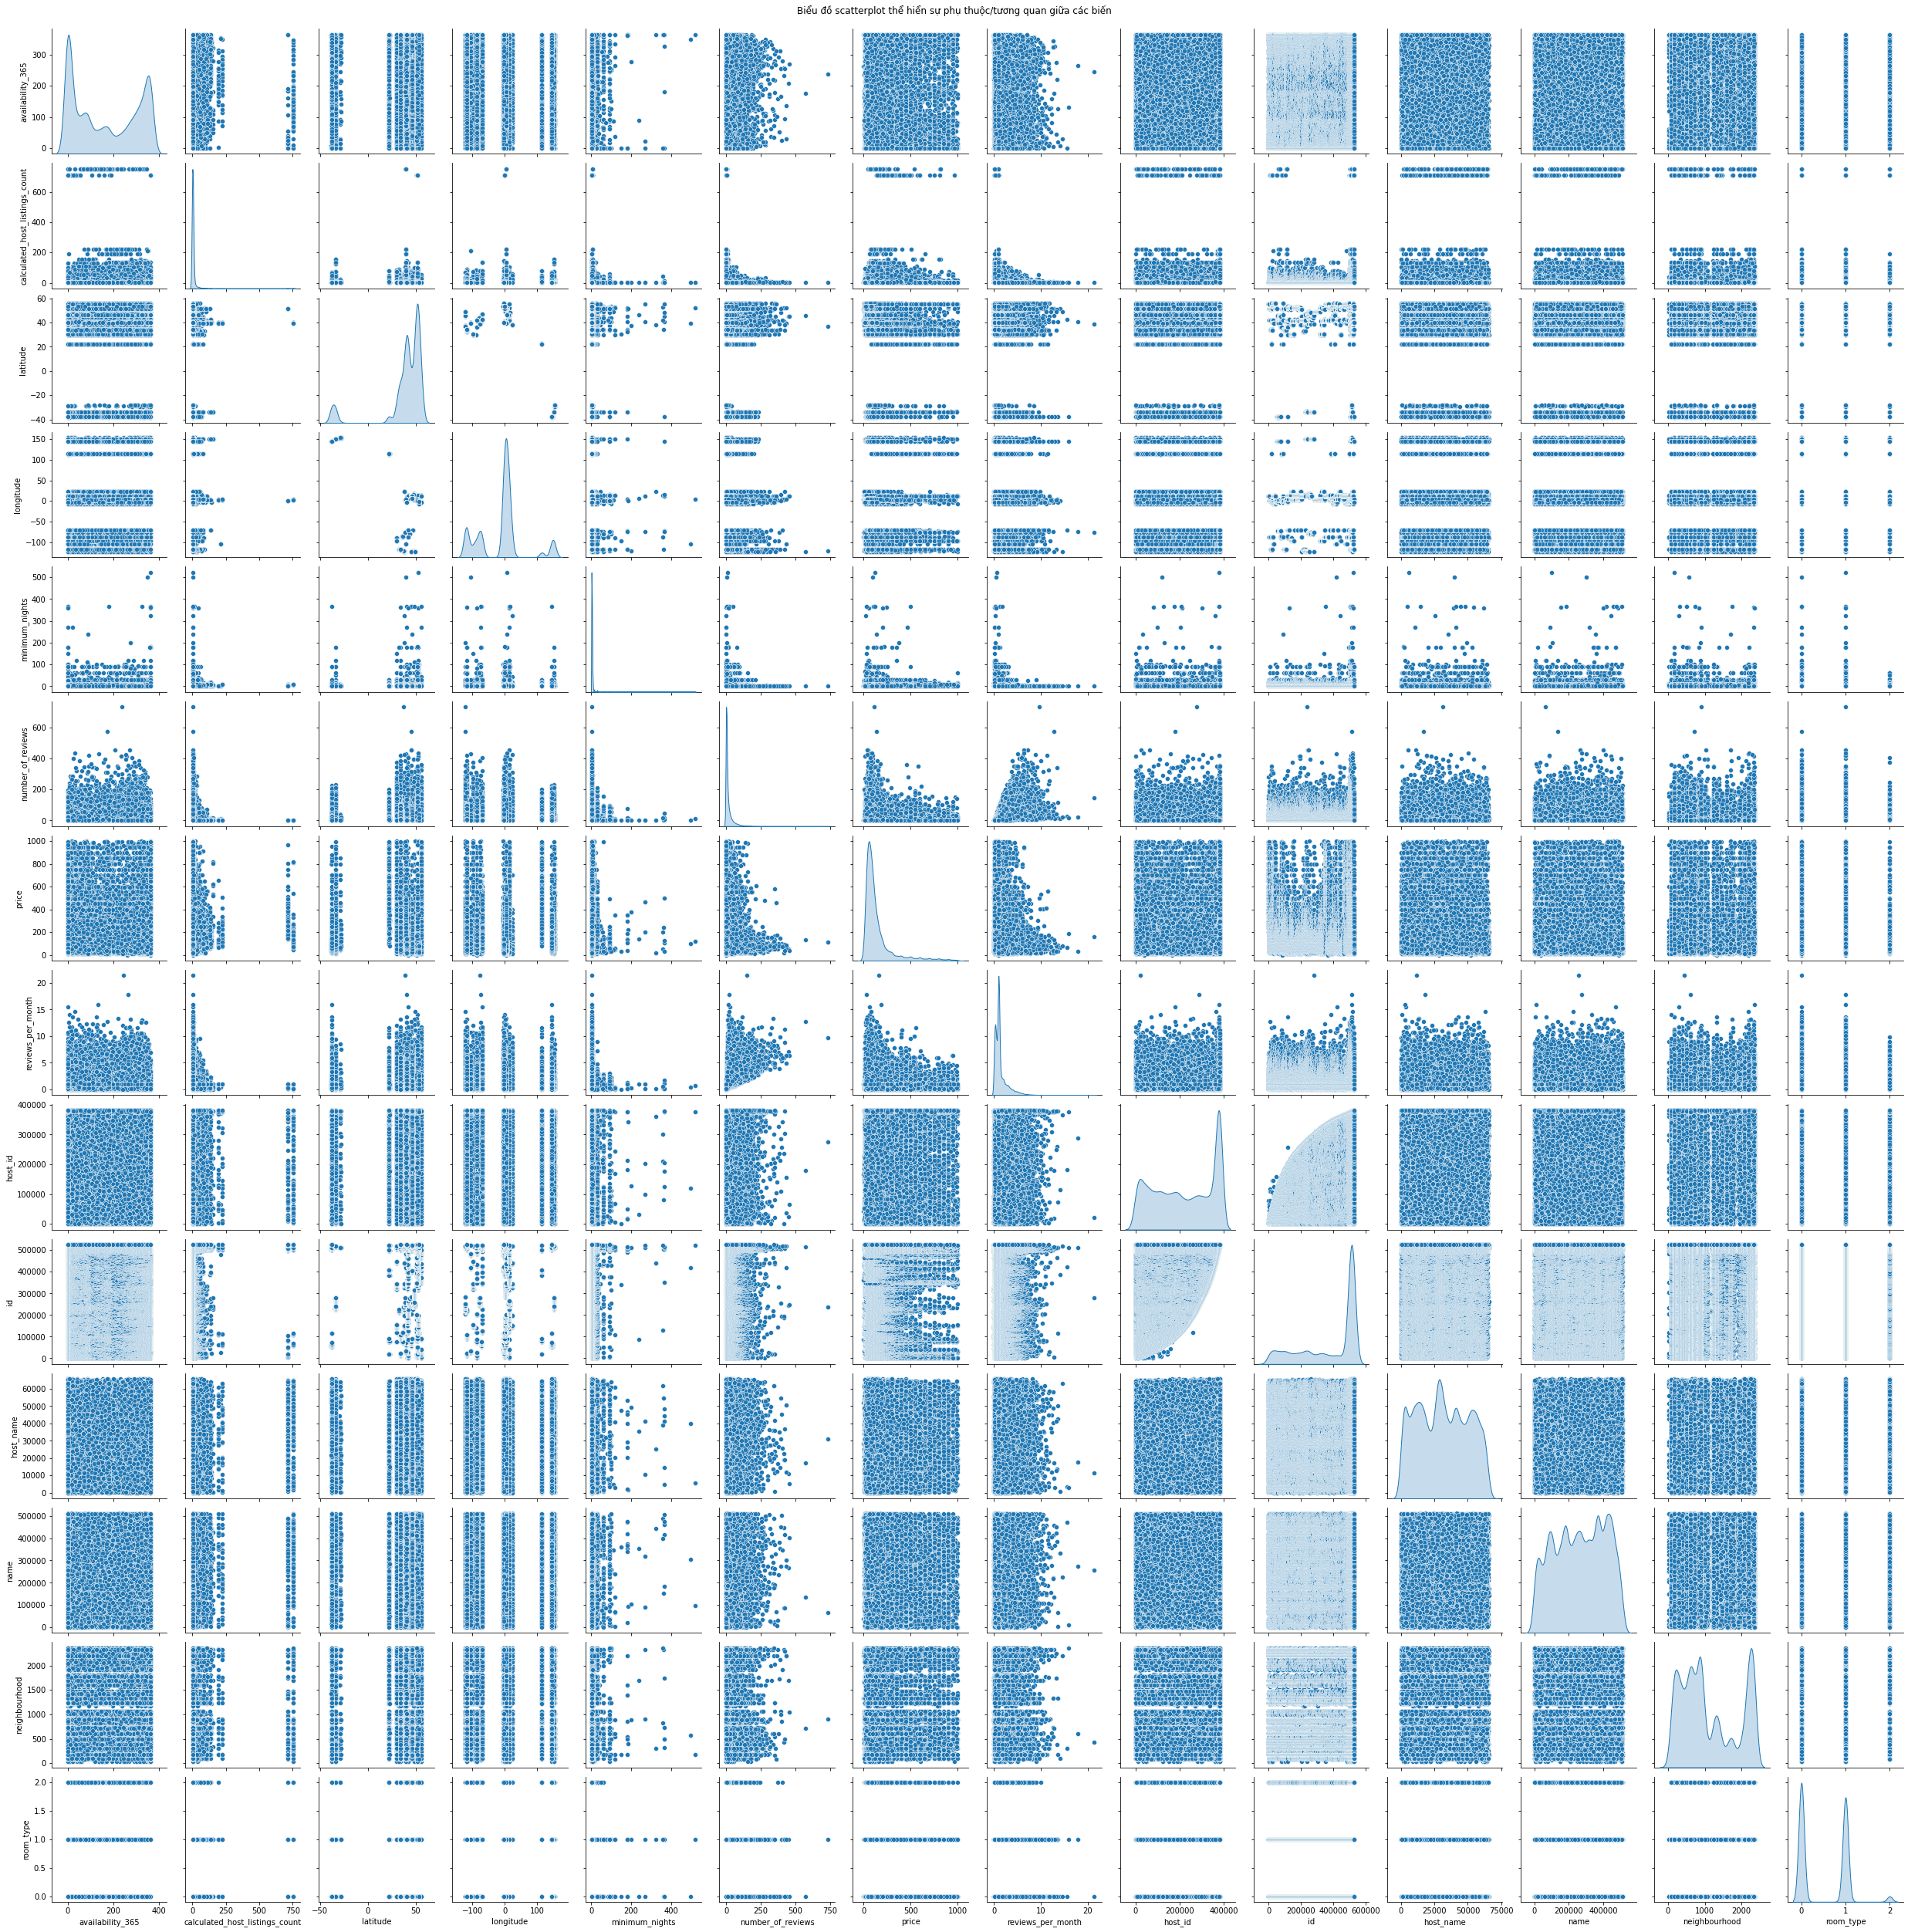

In [26]:
g = sns.pairplot(correlation_df[correlation_df.index.duplicated()], diag_kind = 'kde')
g.fig.suptitle('Biểu đồ scatterplot thể hiển sự phụ thuộc/tương quan giữa các biến', y = 1)
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta thấy càng điểm càng phân bố thành từng cụm thì 2 biến đó sẽ càng tương quan mạnh với nhau hơn. Dễ thấy sự phân bố của 2 biến "latitude" và "longitude".

Với biểu đồ heatmap, ta sẽ tính lập ma trận tương quan (correlation matrix) rồi trực quan hóa bằng biểu đồ heatmap để thể hiện sự tương quan giữa các biến. Trong đó:
- Mỗi màu sắc càng đậm hoặc càng nhạt sẽ thể hiển độ tương quan càng mạnh (càng gần khoảng -1 và 1).
- Mỗi màu sắc không đậm cũng không nhạt sẽ thể hiện độ tương quan càng yếu (càng gần số 0).

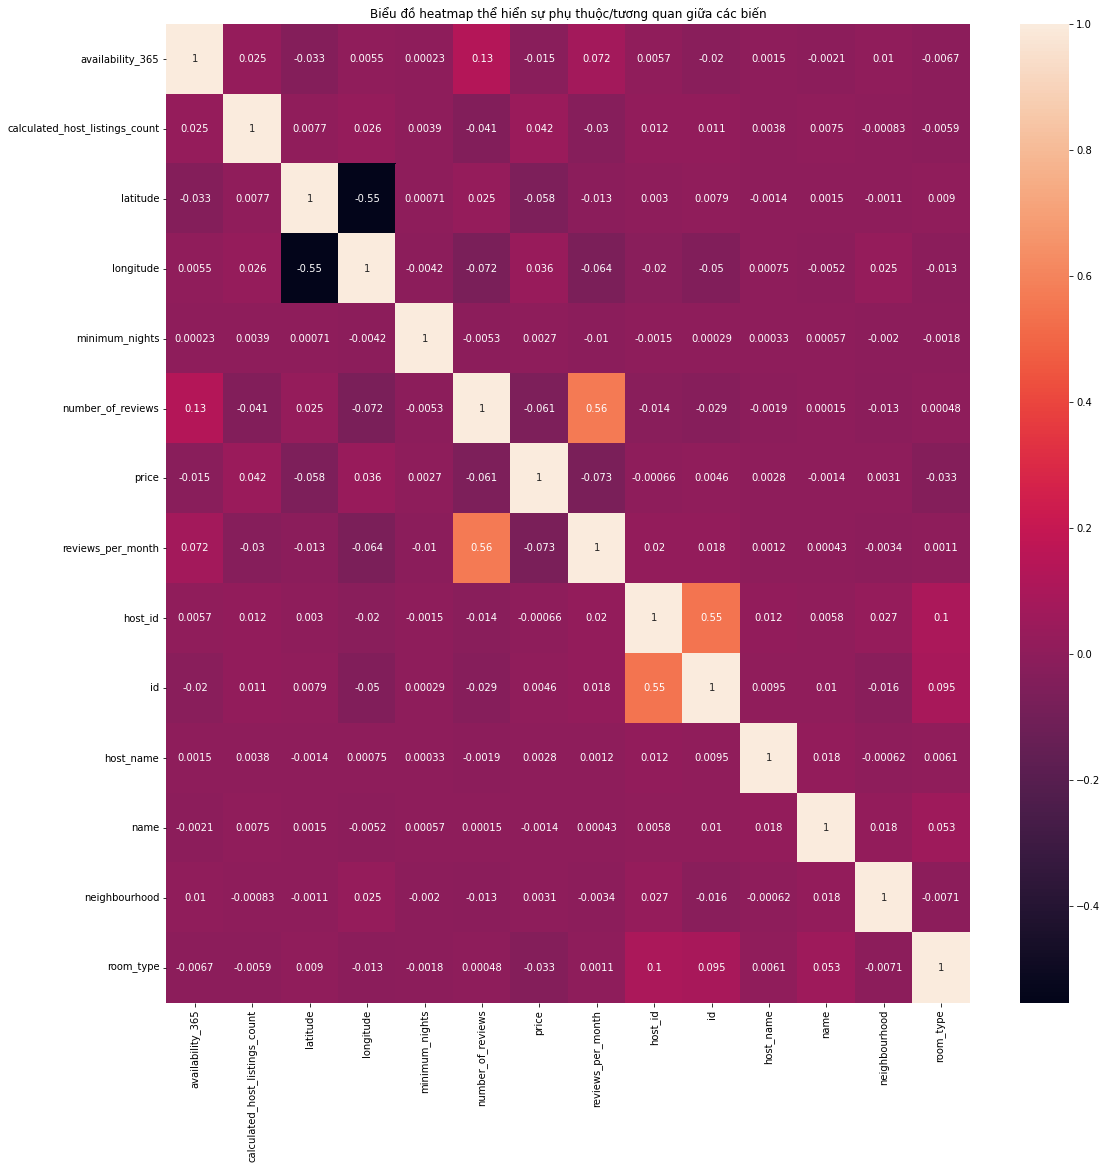

In [27]:
plt.figure(figsize = (18, 18))
sns.heatmap(correlation_df.corr(), annot = True)
plt.title('Biểu đồ heatmap thể hiển sự phụ thuộc/tương quan giữa các biến')
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta thấy các biến dữ liệu ít tương quan với nhau, vì đa số các biến có độ tương quan thuộc nằm trong khoảng từ -0.1 đến 0.1. Trong đó, vẫn xuất hiện những biến có độ tương quan cao như: 
- "latitude" và "longitude" với độ tương quan là -0.55
- "reviews_per_month" và "number_of_reviews" với độ tương quan là 0.56


**Kết luận:** Ta có thể dùng các biến có sự tương quan với nhau để xây dựng mô hình Phân lớp và mô hình Gom cụm.

### Xử lý các giá còn thiếu theo 2 cách

Như phần tiền xử lý ở trên ta chưa thay thế missing values cho cột "price" nên ta sẽ thực hiện nó ở bước này.

Có 2 cách xử lý giá còn thiếu:
- Cách 1: Giá cao (>75%) - Thay thế missing values của cột "price" thành Q3.
- Cách 2: Giá thấp (50%-75%) - Thay thế missing values của cột "price" thành Q2.

Do đó, ta cần quan sát sự phân bố của các loại giá trên để quyết định mô hình học máy phù hợp. Ta sẽ chia thành 2 loại giá sau: giá cao (>75%) và giá thấp (<75%). Với mỗi loại giá ta sẽ tính số lượng giá trị tương ứng với loại giá có trong tập dữ liệu (**num_values**) và tỉ lệ % của chúng (**ratio_values**). Ngoài ra, ta sẽ tính thêm các giá còn thiếu và tỉ lệ của chúng. Sau đó, lưu chúng vào dataframe `statistic_price_df`.

In [28]:
def num_values(condition):
  return airbnb_df[condition]['price'].count()
def ratio_values(condition):
  return airbnb_df[condition]['price'].count() / airbnb_df.shape[0] * 100

mid_point_price = airbnb_df['price'].quantile(0.75)
high_price_condition = airbnb_df['price'] > mid_point_price
low_price_condition = airbnb_df['price'] <= mid_point_price

statistic_price_df = pd.DataFrame({ 'high_price': [num_values(high_price_condition), ratio_values(high_price_condition)],
                                    'low_price': [num_values(low_price_condition), ratio_values(low_price_condition)],
                                    'nan': [airbnb_df['price'].isna().sum(), airbnb_df['price'].isna().mean() * 100]}, index = ['num_values', 'ratio_values']).T
statistic_price_df['num_values'] = statistic_price_df['num_values'].astype(int)
statistic_price_df

num_values  ratio_values
high_price      131102     24.106412
low_price       404788     74.430492
nan               7957      1.463095

Ta sẽ vẽ biểu đồ pieplot để thể hiện tỉ lệ giữa 2 loại giá trên:
- Màu xanh dương: giá cao
- Màu vàng: giá thấp
- Màu xanh lá cây: chưa có giá trị (missing values)

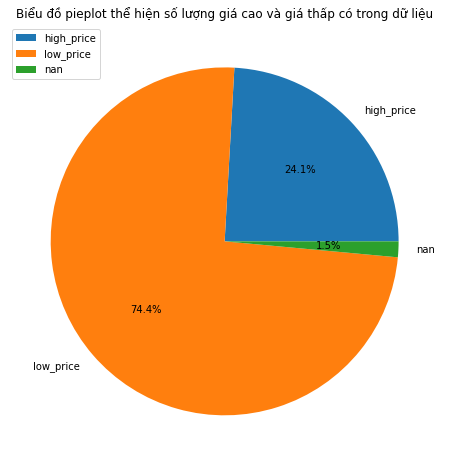

In [29]:
plt.figure(figsize = (8, 8))
plt.pie(statistic_price_df['num_values'], labels = statistic_price_df['num_values'].index, autopct = '%1.1f%%')
plt.title('Biểu đồ pieplot thể hiện số lượng giá cao và giá thấp có trong dữ liệu')
plt.legend()
plt.show()

Có thể thấy số lượng và tỉ lệ giá trị có giá thấp nhiều khoảng 3 lần số lượng giá trị có giá thấp. Trong khi số lượng missing values của cột "price" khá nhỏ (7958 mẫu tương ứng **~1.5%**) so với số lượng mẫu đã có giá trị. Do đó có thể không có sự khác biệt giữa 2 cách xử lý missing values này.

## **Cách 1:** Giá cao (>75%)

---

**Tiền xử lý dữ liệu:** Xử lý missing values

Copy vào một dataframe mới đặt tên là `airbnb_high_df`.

In [30]:
airbnb_high_df = airbnb_df.copy()

Thay thế giá trị NaN của cột "price" bằng giá trị Q3.

In [31]:
airbnb_high_df['price'] = airbnb_high_df['price'].fillna(airbnb_high_df['price'].quantile(0.75))

Xem thử thông tin của các cột dữ liệu sau khi tiền xử lý.

In [32]:
airbnb_high_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543847 entries, 0 to 494953
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   availability_365                543847 non-null  float64       
 1   calculated_host_listings_count  543847 non-null  int64         
 2   host_id                         543847 non-null  int64         
 3   host_name                       543847 non-null  object        
 4   id                              543847 non-null  int64         
 5   last_review                     543847 non-null  datetime64[ns]
 6   latitude                        543847 non-null  float64       
 7   longitude                       543847 non-null  float64       
 8   minimum_nights                  543847 non-null  int64         
 9   name                            543847 non-null  object        
 10  neighbourhood                   543847 non-null  object 

Các cột đều đã có kiểu dữ liệu phù hợp và không có giá trị nào bị thiếu, đủ điều kiện để tiến hành bước tiếp theo xây dựng mô hình học máy.

---

### Có đặc trưng nào không liên quan đến dự đoán giá phòng không? Xử lý như thế nào?

Với các cột không liên quan đến việc dự đoán giá phòng, ta sẽ xóa bỏ các cột này khỏi dataframe `airbnb_high_df` vì ta chỉ cần quan tâm đến các cột có dữ liệu có thể có giá trị hơn là các cột dùng để phân biệt với nhau.

Ta sẽ bỏ đi các cột sau: "id", "host_id", "name", "host_name".

Và ta chỉ giữ lại các cột sau: "availability_365", "calculated_host_listings_count", "last_review", "latitude", "longitude", "minimum_nights", "number_of_reviews", "price", "reviews_per_month", "room_type".

In [33]:
airbnb_high_df = airbnb_high_df[['availability_365', 'calculated_host_listings_count', 'last_review', 'latitude', 'longitude', 'minimum_nights', 'neighbourhood', 'number_of_reviews', 'price', 'reviews_per_month', 'room_type']]

---

**Tiền xử lý dữ liệu:** Chuẩn hóa dữ liệu dạng phân loại (categorical) về dạng số (numerical)

Chuyển dữ liệu của cột "neighbourhood" và "room_type" về dạng số.

In [34]:
enc = OrdinalEncoder()
need_encode_values = enc.fit_transform(airbnb_high_df[['neighbourhood', 'room_type']])
airbnb_high_df = pd.concat([airbnb_high_df[airbnb_high_df.columns.drop(['neighbourhood', 'room_type'])], pd.DataFrame(need_encode_values, columns = ['neighbourhood', 'room_type']).reindex(airbnb_high_df.index)], axis = 1)
airbnb_high_df[['neighbourhood', 'room_type']] = airbnb_high_df[['neighbourhood', 'room_type']].astype(int)

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [35]:
airbnb_high_df.dtypes

availability_365                         float64
calculated_host_listings_count             int64
last_review                       datetime64[ns]
latitude                                 float64
longitude                                float64
minimum_nights                             int64
number_of_reviews                          int64
price                                    float64
reviews_per_month                        float64
neighbourhood                              int64
room_type                                  int64
dtype: object

Các cột đều có kiểu dữ liệu phù hợp.

---

Tiếp theo, ta sẽ vẽ biểu đồ boxplot và histogram cho từng cột dữ liệu để xem thử dữ liệu có xuất hiện outlier không.

Với biểu đồ boxplot, ta sẽ vẽ từng biểu đồ con cho từng cột dữ liệu có trong dữ liệu. Với mỗi biểu đồ con thể hiện các thông tin thống kê mô tả tương ứng với cột dữ liệu đó.
- Các cận bên trái và bên phải tương ứng với giá trị nhỏ nhất (min) và giá trị lớn nhất (max) của dữ liệu.
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ 3 (Q3).
- Đường ở giữa hình hộp tương ứng với giá trị trung bình (mean).
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

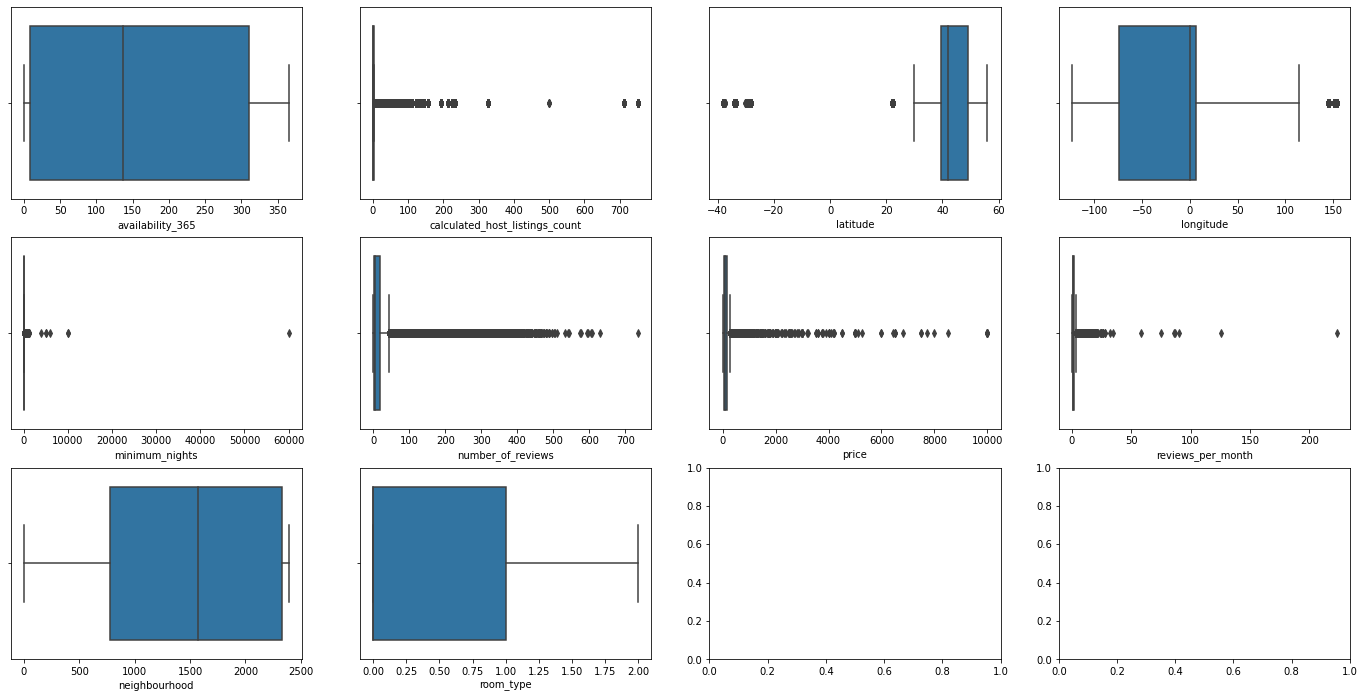

In [36]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_high_df.columns:
  if col == 'last_review':
    continue
  
  plt.subplot(3, 4, i)
  sns.boxplot(x = airbnb_high_df[col])
  i += 1

plt.show()

Nhận xét: Quan sát các biểu đồ boxplot, ta thấy được:
- Các cột "room_type", "neighbourhood", "availability_365" không thấy xuất hiện outlier
- Cột "latitude" và "longitude" có ít outlier nên có thể bỏ qua không cần xử lý vì không ảnh hưởng nhiều đến mô hình.
- Các cột còn lại có xuất hiện nhiều outlier nên khi bắt đầu chọn dữ liệu cho mô hình học máy, ta sẽ tiền xử lý loại bỏ bớt các outlier này.

Với biểu đồ histogram, ta sẽ vẽ từng biểu đồ con cho từng cột dữ liệu có trong dữ liệu. Với mỗi biểu đồ con thể hiện các xem dạng biểu đồ có có phân phối chuẩn chưa. Nếu biểu đồ nào có dạng hình chuông tức là cột dữ liệu đó đã đủ đạt điều kiện phân phối chuẩn.

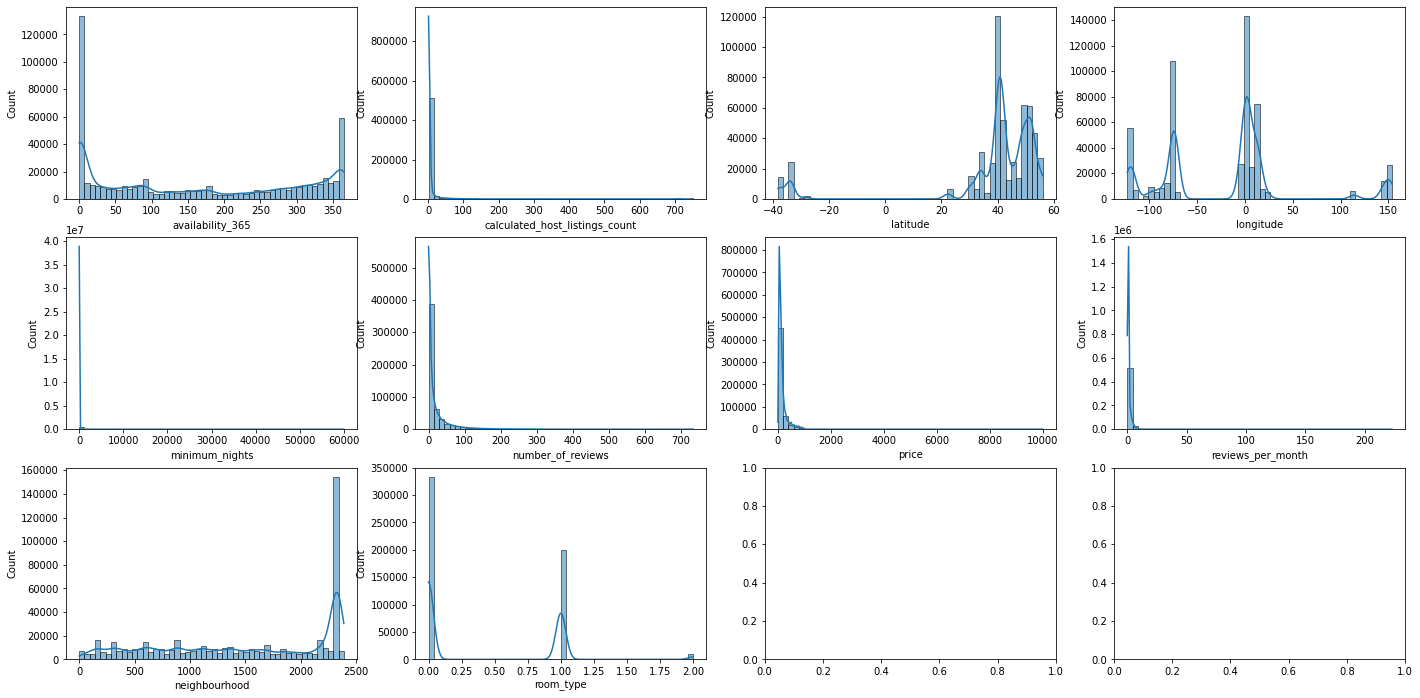

In [37]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_high_df.columns:
  if col == 'last_review':
    continue
  
  plt.subplot(3, 4, i)
  sns.histplot(airbnb_high_df[col], bins = 50, kde = True)
  i += 1

plt.show()

Nhận xét: Quan sát tổng thể các biểu đồ histogram, ta thấy các cột có dữ liệu không lệch quá nhiều mặc dù không có cột dữ liệu nào đạt dạng chuẩn. Do đó, ta sẽ không loại bỏ bất kỳ cột nào.

### Các đặc trưng nào ảnh hưởng/hữu ích đến dự đoán giá phòng? (correlation)

Ta sẽ vẽ biểu đồ scatterplot để thể hiện sự tương quan giữa cột "price" và các cột còn lại có trong dữ liệu. Với mỗi biểu đồ con sẽ có:
- Trục tung: các giá trị tương ứng có trong cột "price".
- Trục hoành: các giá trị tương ứng có trong cột dữ liệu.

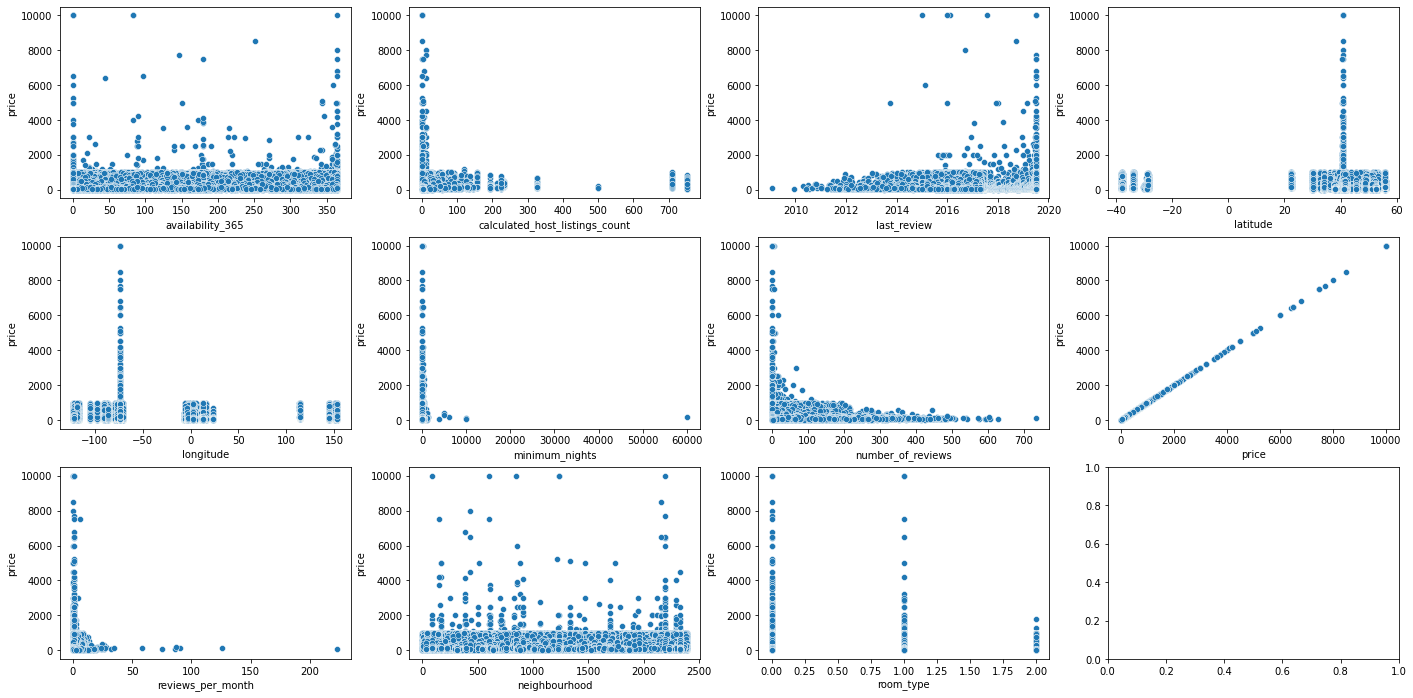

In [38]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_high_df.columns:
  plt.subplot(3, 4, i)
  sns.scatterplot(data = airbnb_high_df, x = col, y = 'price')
  i += 1

plt.show()

Nhận xét: Quan sát các biểu đồ scatterplot trên, ta nhận thấy: 
- Các thuộc tính không có quan hệ nhiều với "price" về dạng Linear.
- Các thuộc tính ảnh hưởng đến thuộc tính "price" dạng K-means.

Sau đó, ta sẽ sử dụng phương pháp Stepwise: Forward/Backward để chọn ra những đặc trưng phù hợp nhất sẽ sử dụng trong mô hình hồi quy.

In [39]:
def stepwise_selection(X, y, initial_list = [], threshold_in = 0.05, threshold_out = 0.05, verbose = True):
  included = list(initial_list)
  while True:
    changed = False

    # forward step
    excluded = list(set(X.columns) - set(included))
    new_pval = pd.Series(index = excluded)
    for new_column in excluded:
      model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
      new_pval[new_column] = model.pvalues[new_column]
    best_pval = new_pval.min()
    if best_pval < threshold_in:
      best_feature = new_pval.idxmin()
      included.append(best_feature)
      changed = True
      if verbose:
        print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
    
    # backward step
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    # use all coefs except intercept
    pvalues = model.pvalues.iloc[:1]
    worst_pval = pvalues.max() # null if pvalues is empty
    if worst_pval > threshold_out:
      changed = True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)
      if verbose:
        print('Drop  {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
    if not changed:
      break
  return included

X = airbnb_high_df[airbnb_high_df.columns.drop(['price', 'last_review'])]
y = airbnb_high_df['price']
result = stepwise_selection(X, y)

Add  number_of_reviews              with p-value 0.0
Add  latitude                       with p-value 0.0
Add  reviews_per_month              with p-value 1.42449e-285
Add  calculated_host_listings_count with p-value 2.10805e-186
Add  room_type                      with p-value 3.55417e-126
Add  availability_365               with p-value 4.08162e-14
Add  longitude                      with p-value 0.0107146


Ta sẽ giữ lại các cột sau: "latitude", "longitude", "number_of_reviews", "reviews_per_month", "price", "calculated_host_listings_count", "room_type", "availability_365", "last_review". Theo phương pháp trên cho ta các cột sau có ảnh hưởng lớn đến việc xây dựng mô hình.

In [40]:
airbnb_high_df = airbnb_high_df[['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'price', 'calculated_host_listings_count', 'room_type', 'last_review', 'availability_365']]

Đối với cột "price" ta sẽ tạo thêm cột "price_label" đặt làm nhãn và chia thành 2 loại: 0 (giá thấp) và 1 (giá cao).

In [41]:
airbnb_high_df['price_label'] = (airbnb_high_df['price'] >= mid_point_price).astype(int)

### Mô hình nào phù hợp để thực hiện yêu cầu dự đoán giá phòng (hồi qui, phân lớp, gom cụm)? Giải thích.

Đặc tính của tập dữ liệu là:
- Có chứa cột có dữ liệu chuỗi thời gian ("last_review") nên hoàn toàn còn cơ sở để xây dựng mô hình hồi quy ARIMA.
- Tập dữ liệu sau khi tiền xử lý có quá ít các cột dạng phân loại (categorical) nên cần phải xây dựng các mô hình gom cụm K-means và SVM để có đủ điều kiện xây dựng mô hình phân lớp.
- Việc dự đoán giá phòng không bao gồm việc dự đoán chính xác giá tiền nên có thể chuyển đổi thành nhãn và dùng mô hình phân lớp Decision Tree để thực hiện.

Do vậy, ta sẽ lần lượt thử nghiệm với từng loại mô hình đã học để tìm ra mô hình nào phù hợp nhất để dự đoán giá phòng:
- Hồi quy: ARIMA
- Gom cụm: K-means, SVM
- Phân lớp: Decision Tree

### Xây dựng mô hình dự đoán với giải pháp lựa chọn, và nêu phương pháp lựa chọn và đánh giá mô hình đã chọn?

#### 1. Mô hình hồi quy

##### a. ARIMA

---

**Tiền xử lý dữ liệu:** Xử lý dữ liệu chuỗi thời gian

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại 2 cột quan trọng cho mô hình là: "last_review" và "price" và lưu vào dataframe `airbnb_arima_df`.

In [42]:
airbnb_arima_df = airbnb_high_df[['last_review', 'price']]

Để tăng tính liên tục của thời gian, ta sẽ bổ sung các ngày còn thiếu với giá tiền mặc định là 0.

In [43]:
date_idx = pd.date_range(airbnb_arima_df['last_review'].min(), airbnb_arima_df['last_review'].max())
not_in_date_idx = date_idx[~date_idx.isin(airbnb_arima_df.index)]
airbnb_arima_df = airbnb_arima_df.append(pd.DataFrame({ 'last_review': not_in_date_idx, 'price': np.full(not_in_date_idx.size, 0)}))

Sau đó, gom nhóm các dòng có cùng tháng và năm và tính số tiền trung bình của từng tháng đó.

In [44]:
airbnb_arima_df = airbnb_arima_df.groupby(pd.Grouper(key = 'last_review', freq = 'MS')).mean()

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [45]:
airbnb_arima_df.head()

price
last_review          
2009-01-01   7.333333
2009-02-01   0.000000
2009-03-01   0.000000
2009-04-01   0.000000
2009-05-01   0.000000

---

Trước tiên, ta cần xem xét chuỗi thời gian xem nó có tính dừng hay không. Bước này có thể được thực hiện bằng cách tính hàm tự tương quan (ACF) và hàm tự tương quan riêng phần (PACF). Ta sẽ trực quan hóa bằng các biểu đồ tương quan gắn với ACF và PACF.

Nếu chuỗi thời gian không có tính dừng, lấy sai phân của nó 1 hay nhiều lần để làm cho
nó có tính dừng.


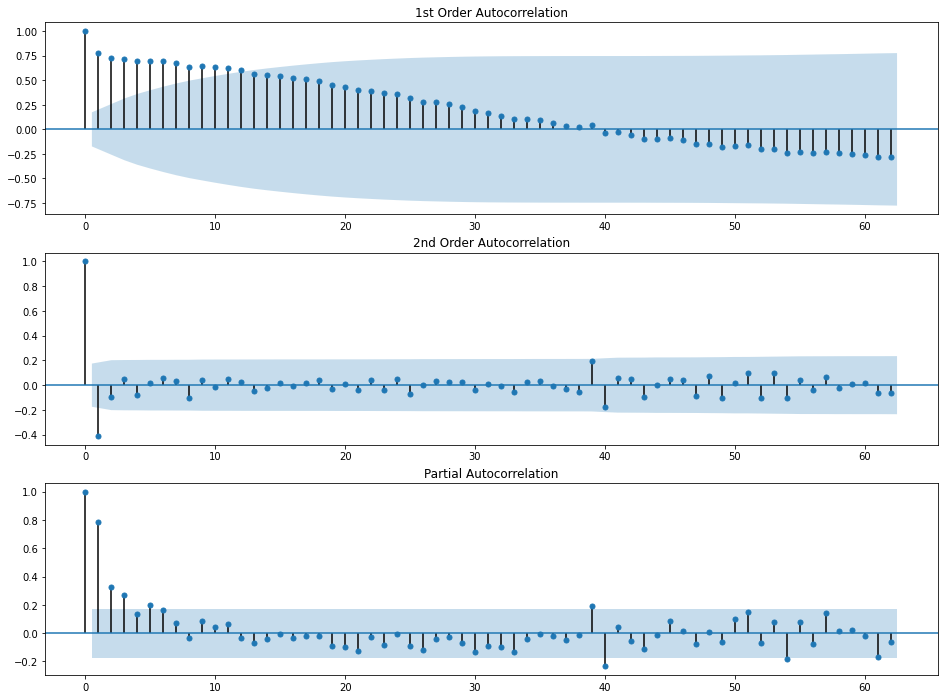

In [46]:
fig, ax = plt.subplots(3, 1, figsize = (16, 12))
fig = plot_acf(airbnb_arima_df['price'], lags = 62, ax = ax[0], title = '1st Order Autocorrelation')
fig = plot_acf(airbnb_arima_df['price'].diff().dropna(), lags = 62, ax = ax[1], title = '2nd Order Autocorrelation')
fig = plot_pacf(airbnb_arima_df['price'].dropna(), lags = 62, ax = ax[2])
plt.show()

Nhận xét: Quan sát từ 2 biểu đồ trên (ACF và PACF), lần đầu tiên của biểu đồ ACF chưa thấy xuất hiện tính dừng vì biểu đồ thay đổi giá trị liên tục từ cao xuống thấp. Do đó ta lấy đạo hàm 1 lần cho biểu đồ ACF để thấy được tính dừng. Tương tự với biểu đồ PACF ta thấy được tính dừng của chuỗi thời gian lần đầu tiên.

Từ đó có thể lựa chọn được các tham số của mô hình ARIMA(p, d, q) như sau:
- p = 2 là bậc của đồ thị AR. Xét từ độ trễ đầu tiên, thanh nào nằm ngoài đường giới hạn và sau độ giảm một cách đáng kể sau một độ trễ.
- d = 1 là bậc sai phân, trong trường hợp này sai phân cách nhau 1 tháng.
- q = 1 là bậc của đồ thị MA. Xét từ độ trễ đầu tiên, thanh nào nằm ngoài đường giới hạn và sau độ tăng một cách đáng kể sau một độ trễ.

Thực hiện xây dựng mô hình ARIMA và in ra tóm tắt kết quả chạy mô hình bằng các thông số mô tả.

In [47]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
split_point = int(airbnb_arima_df.shape[0] * 0.7)
X = airbnb_arima_df[:split_point]
y = airbnb_arima_df[split_point:]

# Xây dựng mô hình ARIMA
model = ARIMA(X, order = (2, 1, 1))
model_fit = model.fit()

# Tóm tắt kết quả mô hình
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   87
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -382.791
Method:                       css-mle   S.D. of innovations             19.616
Date:                Fri, 30 Dec 2022   AIC                            775.582
Time:                        17:32:22   BIC                            787.912
Sample:                    02-01-2009   HQIC                           780.547
                         - 04-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6483      0.618      2.665      0.008       0.436       2.860
ar.L1.D.price    -0.1292      0.165     -0.781      0.435      -0.453       0.195
ar.L2.D.price     0.0041      0.141     

Dự đoán kết quả chạy mô hình trên tập test với 95% tin cậy.

In [48]:
# Dự đoán trên tập test với 95% tin cậy
fc, se, conf = model_fit.forecast(airbnb_arima_df.shape[0] - split_point, alpha = 0.05)

Sau đó, để so sánh giữa kết quả dự đoán từ mô hình với kết quả thực tế trên tập test, ta sẽ vẽ biểu đồ đường thể hiện kết quả dự đoán giá phòng ("price") dựa vào "last_review". Trong đó:
- Trục tung: giá phòng
- Trục hoành: ngày review cuối cùng

Các đường màu thể hiện các ý nghĩa khác nhau:
- Màu xanh dương: giá phòng của tập train.
- Màu cam: giá phòng của tập test.
- Màu xanh lá: giá phòng được dự đoán từ mô hình.

Khoảng màu xám thể hiện cận trên và cận dưới giao động trong việc dự đoán mô hình.

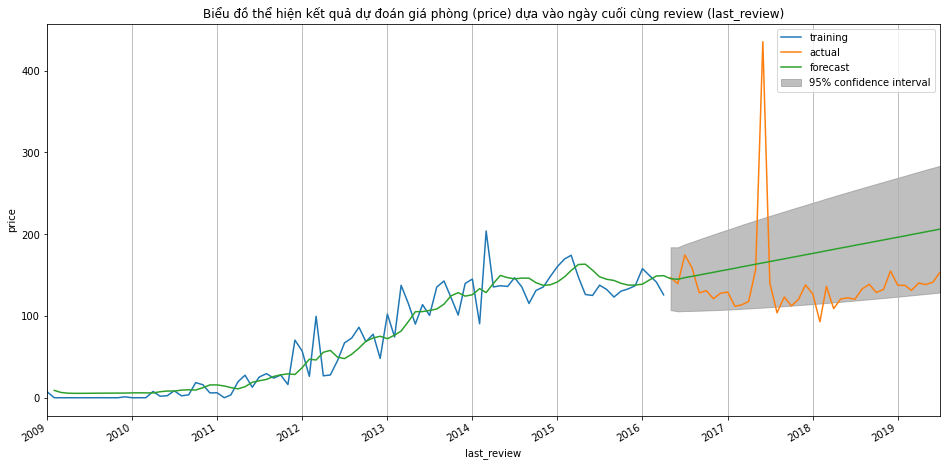

In [49]:
# Tạo Series cho biểu đồ
fc_series = pd.Series(fc, index = y.index)
lower_series = pd.Series(conf[:, 0], index = y.index)
upper_series = pd.Series(conf[:, 1], index = y.index)

# Vẽ biểu đồ trực quan hóa
fig, ax = plt.subplots(figsize = (16, 8))
plt.plot(X, label = 'training')
plt.plot(y, label = 'actual')
fig = model_fit.plot_predict(end = y.index[y.size - 1], dynamic = False, plot_insample = False, ax = ax)
plt.xlim(airbnb_arima_df.index.min(), airbnb_arima_df.index.max())
plt.title('Biểu đồ thể hiện kết quả dự đoán giá phòng (price) dựa vào ngày cuối cùng review (last_review)')
plt.xlabel('last_review')
plt.ylabel('price')
plt.legend()
plt.grid(axis = 'x')
plt.show()

Nhận xét: Quan sát biểu đồ đường ta thấy kết quả dự đoán giá phòng (forecast) có sự tương đồng so với tập dữ liệu thực tế (actual) trong 60 ngày cuối. Ngoài ra còn nhận thấy sự tăng dần của giá phòng theo từng năm chứng tỏ sự tương quan giữa "price" và "last_review" càng cao thì giá phòng càng tăng theo.

Ta sẽ đánh giá mô hình ARIMA dựa vào các độ đo 'Good-Of-Fit' cho mô hình như: ME, MAE, MPE, MAPE, MSE, RMSE, R2, ACF1.

In [50]:
def mean_error(y_test, y_pred):
  return np.mean(y_pred - y_test)
def mean_percentage_error(y_test, y_pred):
  return np.mean((y_pred - y_test) / y_test)
def root_mean_squared_error(y_test, y_pred):
  return sqrt(mean_squared_error(y_test, y_pred))
y_test = airbnb_arima_df[split_point:]['price'].values
y_pred = fc_series.values

# The mean error
print('Mean error (ME):                           %.4f' % mean_error(y_test, y_pred))
# The mean absolute error
print('Mean absolute error (MAE):                 %.4f' % mean_absolute_error(y_test, y_pred))
# The mean percentage error
print('Mean percentage error (MPE):               %.4f' % mean_percentage_error(y_test, y_pred))
# The mean absolute percentage error
print('Mean absolute percentage error (MAPE):     %.4f' % mean_absolute_percentage_error(y_test, y_pred))
# The mean squared error
print('Mean squared error (MSE):                  %.4f' % mean_squared_error(y_test, y_pred))
# The root mean squared error
print('Root mean squared error (RMSE):            %.4f' % root_mean_squared_error(y_test, y_pred))
# The R squared
print('R-Square (R2):                             %.4f' % r2_score(y_test, y_pred))
# The autocorrelation of errors at lag 1
print('Autocorrelation of errors at lag 1 (ACF1): %.4f' % acf(fc - y_test)[1])

Mean error (ME):                           35.7408
Mean absolute error (MAE):                 51.6307
Mean percentage error (MPE):               0.3280
Mean absolute percentage error (MAPE):     0.3718
Mean squared error (MSE):                  4325.2753
Root mean squared error (RMSE):            65.7668
R-Square (R2):                             -0.6890
Autocorrelation of errors at lag 1 (ACF1): 0.2489


In [51]:
# Accuracy
accuracy_arima_high = (1 - mean_absolute_percentage_error(y_test, y_pred)) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_arima_high}')

Mô hình dự đoán với độ chính xác là: 62.82375405401177


Nhận xét: Mô hình ARIMA dự đoán giá phòng dựa vào ngày cuối cùng review và cho ra kết quả với độ chính xác khá thấp **(~62.82%)** so với kỳ vọng vì có tỉ lệ % độ lỗi trung bình tuyệt đối cao và mô hình đòi hỏi phải dự đoán gần đúng với kết quả thực tế thay vì dự đoán nhãn cho tập dữ liệu.

#### 2. Mô hình gom cụm

##### a. K-means

---

**Tiền xử lý dữ liệu:** Chuẩn hóa dữ liệu

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "latitude", "longitude", "price_label" và lưu vào dataframe `airbnb_kmeans_df`.

In [52]:
airbnb_kmeans_df = airbnb_high_df[['latitude', 'longitude', 'price_label']]

Sau đó, ta sẽ chuẩn hóa dữ liệu theo kiểu min-max để ước tính chia tỉ lệ của từng cột riêng lẻ sao cho nó nằm trong khoảng từ 0 đến 1.

In [53]:
scaler = MinMaxScaler()
new_airbnb_kmeans_data = scaler.fit_transform(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])])
airbnb_kmeans_df = pd.DataFrame(new_airbnb_kmeans_data, columns = airbnb_kmeans_df.columns.drop(['price_label']))
airbnb_kmeans_df['price_label'] = airbnb_high_df['price_label'].values

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [54]:
airbnb_kmeans_df.head()

latitude  longitude  price_label
0  0.837108   0.177877            0
1  0.838235   0.177836            1
2  0.838823   0.177988            1
3  0.837508   0.177923            0
4  0.838711   0.177980            0

---

Đầu tiên, ta sử dụng phương pháp Elbow để tìm k (số cluster) phù hợp nhất để xây dựng mô hình.

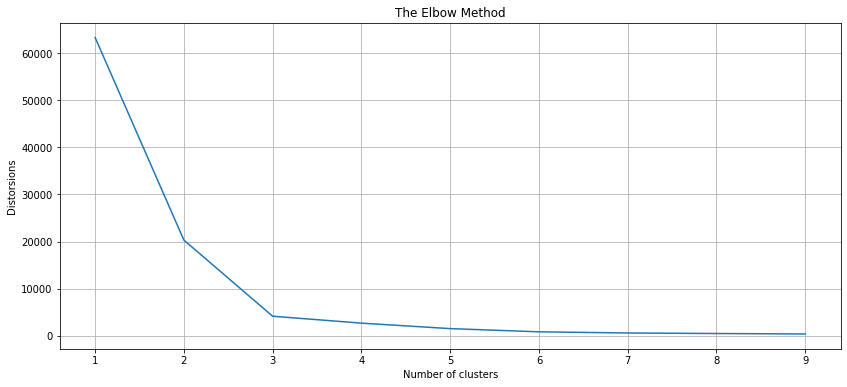

In [55]:
distorsions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])])
    distorsions.append(kmeans.inertia_)
plt.figure(figsize = (14, 6))
plt.plot(range(1, 10), distorsions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distorsions')
plt.grid()
plt.show()

Nhận xét: Theo biểu đồ trên, chúng ta có thể thấy một đường gấp khúc tại **k = 2**. Do đó **k = 2** có thể được xem là 1 giá trị tốt của mô hình K-means để gom cụm dữ liệu.

Thực hiện xây dựng mô hình K-means và tìm các điểm trung tâm gom cụm.

In [56]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
X = airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])]
y = airbnb_kmeans_df['price_label']

# Xây dựng mô hình K-means
model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model_fit = model.fit(X)

# Gán cụm cho tập dữ liệu
airbnb_kmeans_df['cluster'] = model.labels_

# Tìm các điểm trung tâm gom cụm
print('Cluster centers:')
print(model.cluster_centers_)

Cluster centers:
[[0.8748895  0.32216102]
 [0.03468948 0.98384246]]


Để dễ trực quan hơn, ta sẽ vẽ biểu đồ scatterplot để thể hiện các gom cụm của dữ liệu. Trong đó:
- Trục tung: kinh độ
- Trục hoành: vĩ độ

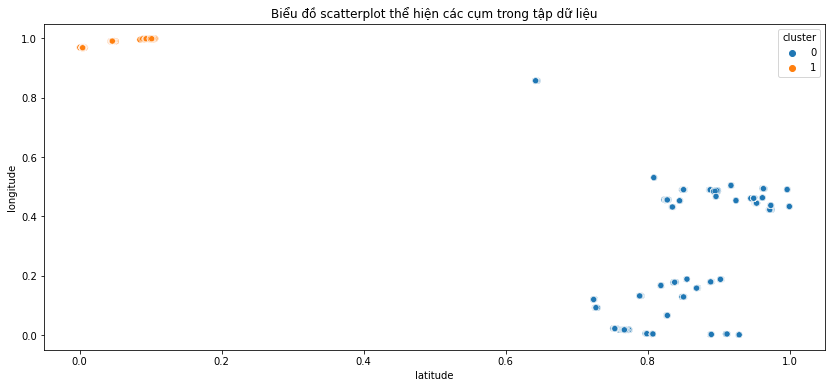

In [57]:
# Giảm chiều dữ liệu
# pca = PCA(n_components = 2)
# pca_df = pd.DataFrame(pca.fit_transform(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['cluster'])]), columns = ['component 1', 'component 2'])
# pca_df['cluster'] = airbnb_kmeans_df['cluster']

# Vẽ biểu đồ trực quan hóa
plt.figure(figsize = (14, 6))
sns.scatterplot(data = airbnb_kmeans_df, x = 'latitude', y = 'longitude', hue = 'cluster').set_title('Biểu đồ scatterplot thể hiện các cụm trong tập dữ liệu')
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta có thể thấy các cụm dữ liệu được chia thành 2 cụm riêng biệt:
- Cụm 0: Nằm ở phía bên phải.
- Cụm 1: Nằm ở phía bên trái.

Ta sẽ đánh giá mô hình K-means dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.7021
Precision:   0.3895
Recall:      0.1036
F-score:     0.1636
Confusion Matrix:


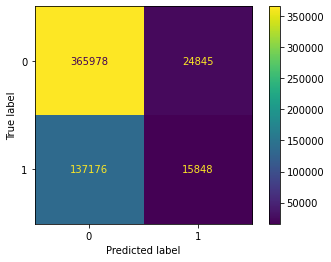

In [58]:
def plot_confusion_matrix(y_test, y_pred):
  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.show()
y_test = airbnb_kmeans_df['price_label'].values
y_pred = airbnb_kmeans_df['cluster'].values

# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [59]:
# Accuracy
accuracy_kmeans_high = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_kmeans_high}')

Mô hình dự đoán với độ chính xác là: 70.20834903934379


Nhận xét: Mô hình K-means dự đoán giá phòng dựa vào vị trí của căn phòng dịch vụ với độ chính xác khá cao **(~70.21%)**, tuy nhiên với các mô hình gom cụm ta chỉ biết được giá phòng theo nhãn ("price_label") mà không biết được chính xác được cụ thể giá phòng.

##### b. SVM

---

**Tiền xử lý dữ liệu:** Loại bỏ các cột không cần thiết

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "number_of_reviews", "reviews_per_month", "price" và lưu vào dataframe `airbnb_svm_df`.

In [60]:
airbnb_svm_df = airbnb_high_df[['number_of_reviews', 'reviews_per_month', 'price_label']]

Sau đó, ta sẽ chuẩn hóa dữ liệu của 2 cột "number_of_reviews" và "reviews_per_month" theo kiểu z-score để ước tính chia tỉ lệ của từng cột riêng lẻ sao cho các giá trị có mean = 0.

In [61]:
scaler = StandardScaler()
new_airbnb_svm_data = scaler.fit_transform(airbnb_svm_df[airbnb_svm_df.columns.drop(['price_label'])])
airbnb_svm_df = pd.DataFrame(new_airbnb_svm_data, columns = airbnb_svm_df.columns.drop(['price_label']))
airbnb_svm_df['price_label'] = airbnb_high_df['price_label'].values

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [62]:
airbnb_svm_df.head()

number_of_reviews  reviews_per_month  price_label
0          -0.247359          -0.755328            0
1           0.821884          -0.643232            1
2          -0.514670          -0.234409            1
3           7.504655           2.165776            0
4          -0.247359          -0.827861            0

---

Thực hiện xây dựng mô hình SVM với 10000 dòng dữ liệu đầu tiên vì việc tính toán chi phí thời gian để xây dựng mô hình này khá tốn kém nên ta phải giảm kích thước của tập dữ liệu.

In [63]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
X = airbnb_svm_df.iloc[:10000, [0, 1]].values
y = airbnb_svm_df.iloc[:10000, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Xây dựng mô hình SVM
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Dự đoán kết quả chạy mô hình trên tập test.

In [64]:
# Dự đoán dữ liệu trên tập test
y_pred = model.predict(X_test)

Để dễ trực quan hơn, ta sẽ vẽ biểu đồ scatterplot thể hiện 2 cụm chính trong tập dữ liệu. Trong đó:
- Chấm màu đen và chấm màu hồng thể hiện các điểm trước gom cụm
- Vùng màu đỏ và vùng màu xanh thể hiện các điểm sau gom cụm

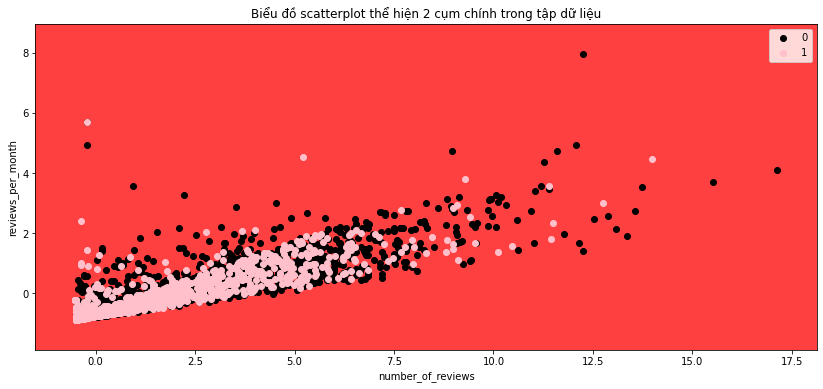

In [65]:
# Vẽ biểu đồ trực quan hóa
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), \
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (14, 6))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('black', 'pink'))(i), label = j)
plt.title('Biểu đồ scatterplot thể hiện 2 cụm chính trong tập dữ liệu')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.legend()
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta không thấy vùng màu xanh xuất hiện cũng như chỉ thấy mỗi vùng màu đó. Điều đó cho thấy tất cả các điểm ban đầu đã thuộc cùng một cụm.

Ta sẽ đánh giá mô hình SVM dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.6143
Precision:   0.0000
Recall:      0.0000
F-score:     0.0000
Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


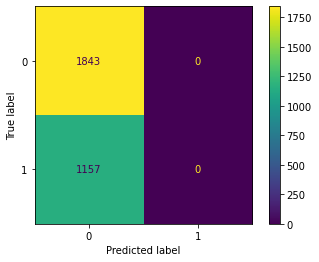

In [66]:
# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [67]:
# Accuracy
accuracy_svm_high = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_svm_high}')

Mô hình dự đoán với độ chính xác là: 61.43333333333333


Nhận xét: Cũng tương tự như mô hình K-means, mô hình SVM dự đoán giá phòng dựa vào số lượt review với độ chính xác trung bình **(~61.43%)**, và cũng giống như các mô hình gom cụm khác, ta chỉ biết được giá phòng theo nhãn ("price_label") mà không biết được chính xác được cụ thể giá phòng. Nếu so với cùng mô hình gom cụm là K-means thì mô hình SVM không dự đoán tốt bằng do có tỉ lệ % chính xác thấp hơn mô hình K-means.

#### 4. Mô hình phân lớp

##### a. Decision Tree

---

**Tiền xử lý dữ liệu:** Loại bỏ các cột không cần thiết

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "room_type", "cluster", "price_label" và lưu vào dataframe `airbnb_decision_tree_df`.

In [68]:
airbnb_decision_tree_df = airbnb_high_df[['room_type', 'price_label']]
airbnb_decision_tree_df['cluster'] = airbnb_kmeans_df['cluster']

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [69]:
airbnb_decision_tree_df.head()

room_type  price_label  cluster
0          1            0        0
1          0            1        0
2          1            1        0
3          0            0        0
4          0            0        0

---

Thực hiện xây dựng mô hình Decision Tree.

In [70]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
feature_cols = airbnb_decision_tree_df.columns.drop(['price_label'])
X = airbnb_decision_tree_df[feature_cols]
y = airbnb_decision_tree_df['price_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Xây dựng mô hình Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Dự đoán kết quả chạy mô hình trên tập test.

In [71]:
# Dự đoán dữ liệu trên tập test
y_pred = clf.predict(X_test)

Ta sẽ trực quan hóa mô hình bằng cây quyết định để thấy được các nhánh cũng như sự phân lớp của cây.

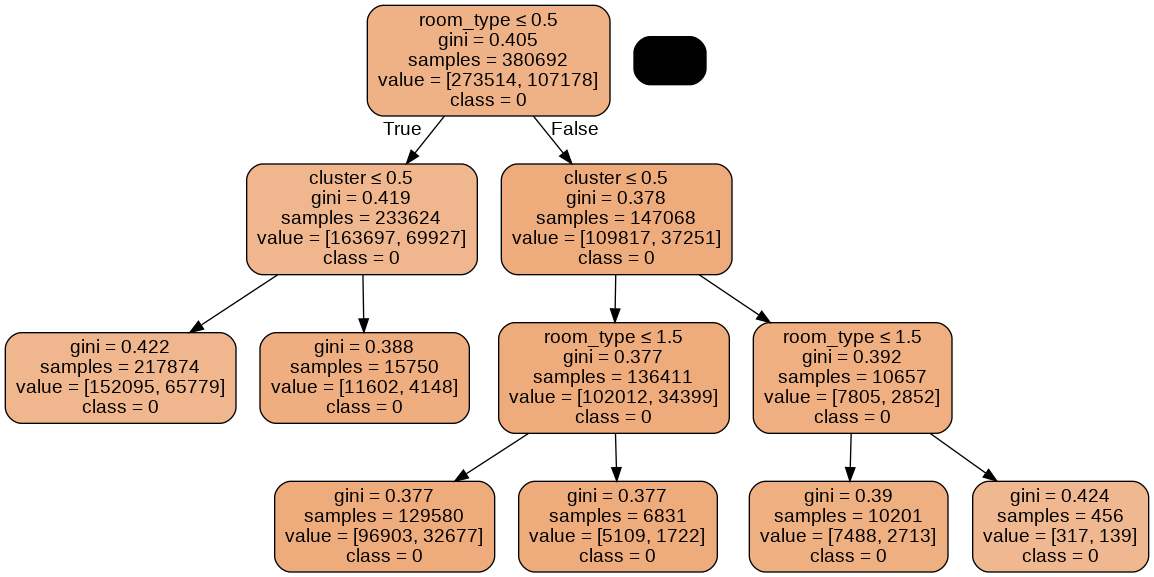

In [72]:
# Vẽ biểu đồ trực quan hóa
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

Ta sẽ đánh giá mô hình Decision Tree dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.7190
Precision:   0.0000
Recall:      0.0000
F-score:     0.0000
Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


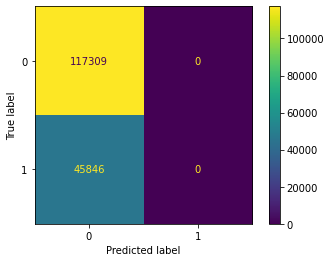

In [73]:
# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [74]:
# Accuracy
accuracy_decision_tree_high = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_decision_tree_high}')

Mô hình dự đoán với độ chính xác là: 71.90034016732555


Nhận xét: Mô hình Decision Tree dự đoán giá phòng dựa vào loại phòng và phân cụm với độ chính xác khá cao **(~71.9%)**, tuy nhiên với các mô hình phân lớp ta chỉ dự đoán được đúng nhãn của giá và do dữ liệu không có nhiều cột dạng phân loại nên việc sử dụng mô hình Decision Tree vào tập dữ liệu này mang tính chủ quan.

## **Cách 2:** Giá thấp (50%-75%)

---

**Tiền xử lý dữ liệu:** Xử lý missing values

Copy vào một dataframe mới đặt tên là `airbnb_high_df`.

In [75]:
airbnb_low_df = airbnb_df.copy()

Thay thế giá trị NaN của cột "price" bằng giá trị Q2.

In [76]:
airbnb_low_df['price'] = airbnb_low_df['price'].fillna(airbnb_low_df['price'].quantile(0.5))

Xem thử thông tin của các cột dữ liệu sau khi tiền xử lý.

In [77]:
airbnb_low_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543847 entries, 0 to 494953
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   availability_365                543847 non-null  float64       
 1   calculated_host_listings_count  543847 non-null  int64         
 2   host_id                         543847 non-null  int64         
 3   host_name                       543847 non-null  object        
 4   id                              543847 non-null  int64         
 5   last_review                     543847 non-null  datetime64[ns]
 6   latitude                        543847 non-null  float64       
 7   longitude                       543847 non-null  float64       
 8   minimum_nights                  543847 non-null  int64         
 9   name                            543847 non-null  object        
 10  neighbourhood                   543847 non-null  object 

Các cột đều đã có kiểu dữ liệu phù hợp và không có giá trị nào bị thiếu, đủ điều kiện để tiến hành bước tiếp theo xây dựng mô hình học máy.

---

### Có đặc trưng nào không liên quan đến dự đoán giá phòng không? Xử lý như thế nào?

Với các cột không liên quan đến việc dự đoán giá phòng, ta sẽ xóa bỏ các cột này khỏi dataframe `airbnb_low_df` vì ta chỉ cần quan tâm đến các cột có dữ liệu có thể có giá trị hơn là các cột dùng để phân biệt với nhau.

Ta sẽ bỏ đi các cột sau: "id", "host_id", "name", "host_name".

Và ta chỉ giữ lại các cột sau: "availability_365", "calculated_host_listings_count", "last_review", "latitude", "longitude", "minimum_nights", "number_of_reviews", "price", "reviews_per_month", "room_type".

In [78]:
airbnb_low_df = airbnb_low_df[['availability_365', 'calculated_host_listings_count', 'last_review', 'latitude', 'longitude', 'minimum_nights', 'neighbourhood', 'number_of_reviews', 'price', 'reviews_per_month', 'room_type']]

---

**Tiền xử lý dữ liệu:** Chuẩn hóa dữ liệu dạng phân loại (categorical) về dạng số (numerical)

Chuyển dữ liệu của cột "neighbourhood" và "room_type" về dạng số.

In [79]:
enc = OrdinalEncoder()
need_encode_values = enc.fit_transform(airbnb_low_df[['neighbourhood', 'room_type']])
airbnb_low_df = pd.concat([airbnb_low_df[airbnb_low_df.columns.drop(['neighbourhood', 'room_type'])], pd.DataFrame(need_encode_values, columns = ['neighbourhood', 'room_type']).reindex(airbnb_low_df.index)], axis = 1)
airbnb_low_df[['neighbourhood', 'room_type']] = airbnb_low_df[['neighbourhood', 'room_type']].astype(int)

Xem thử kiểu dữ liệu của các cột dữ liệu.

In [80]:
airbnb_low_df.dtypes

availability_365                         float64
calculated_host_listings_count             int64
last_review                       datetime64[ns]
latitude                                 float64
longitude                                float64
minimum_nights                             int64
number_of_reviews                          int64
price                                    float64
reviews_per_month                        float64
neighbourhood                              int64
room_type                                  int64
dtype: object

Các cột đều có kiểu dữ liệu phù hợp.

---

Tiếp theo, ta sẽ vẽ biểu đồ boxplot và histogram cho từng cột dữ liệu để xem thử dữ liệu có xuất hiện outlier không.

Với biểu đồ boxplot, ta sẽ vẽ từng biểu đồ con cho từng cột dữ liệu có trong dữ liệu. Với mỗi biểu đồ con thể hiện các thông tin thống kê mô tả tương ứng với cột dữ liệu đó.
- Các cận bên trái và bên phải tương ứng với giá trị nhỏ nhất (min) và giá trị lớn nhất (max) của dữ liệu.
- Các cạnh bên trái và bên phải của hình hộp tương ứng với khoảng tứ phân vị thứ nhất (Q1) và khoảng tứ phân vị thứ 3 (Q3).
- Đường ở giữa hình hộp tương ứng với giá trị trung bình (mean).
- Các chấm còn lại nằm ở bên ngoài cận bên trái và cận bên phải là các outlier xuất hiện trong tập dữ liệu.

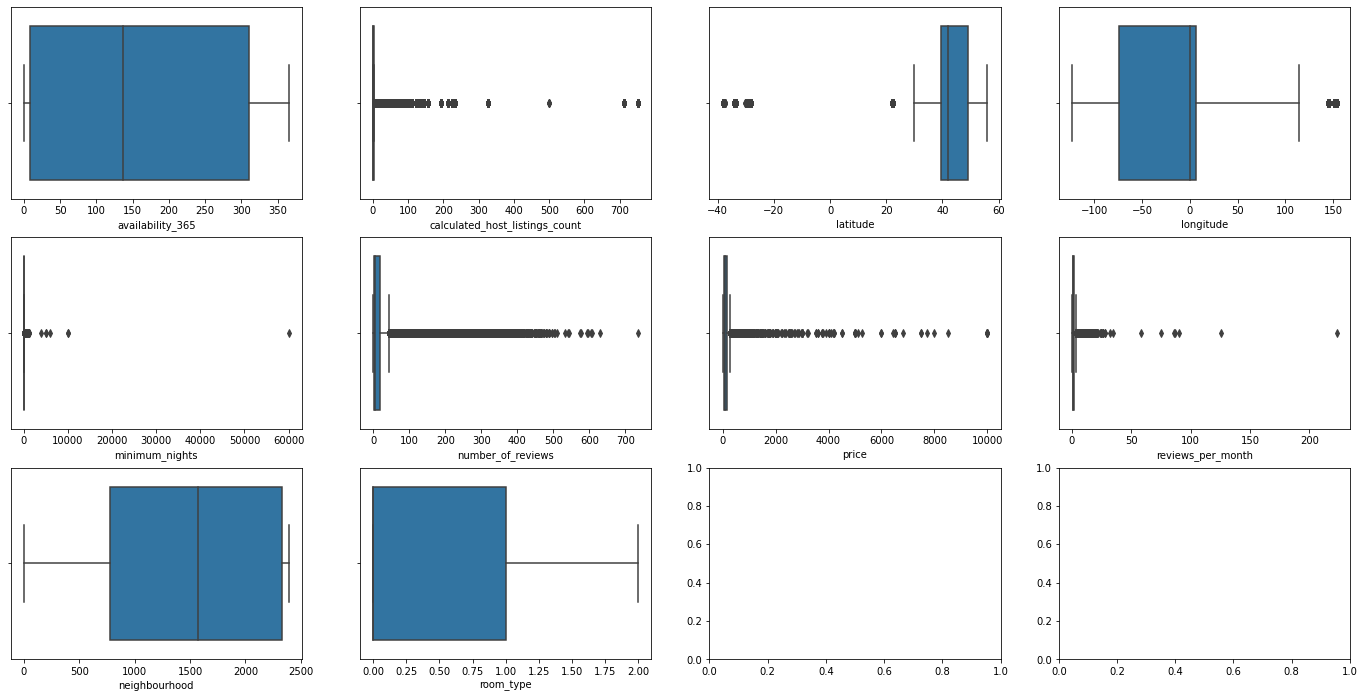

In [81]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_low_df.columns:
  if col == 'last_review':
    continue
  
  plt.subplot(3, 4, i)
  sns.boxplot(x = airbnb_low_df[col])
  i += 1

plt.show()

Nhận xét: Quan sát các biểu đồ boxplot, ta thấy được:
- Các cột "room_type", "neighbourhood", "availability_365" không thấy xuất hiện outlier
- Cột "latitude" và "longitude" có ít outlier nên có thể bỏ qua không cần xử lý vì không ảnh hưởng nhiều đến mô hình.
- Các cột còn lại có xuất hiện nhiều outlier nên khi bắt đầu chọn dữ liệu cho mô hình học máy, ta sẽ tiền xử lý loại bỏ bớt các outlier này.

Với biểu đồ histogram, ta sẽ vẽ từng biểu đồ con cho từng cột dữ liệu có trong dữ liệu. Với mỗi biểu đồ con thể hiện các xem dạng biểu đồ có có phân phối chuẩn chưa. Nếu biểu đồ nào có dạng hình chuông tức là cột dữ liệu đó đã đủ đạt điều kiện phân phối chuẩn.

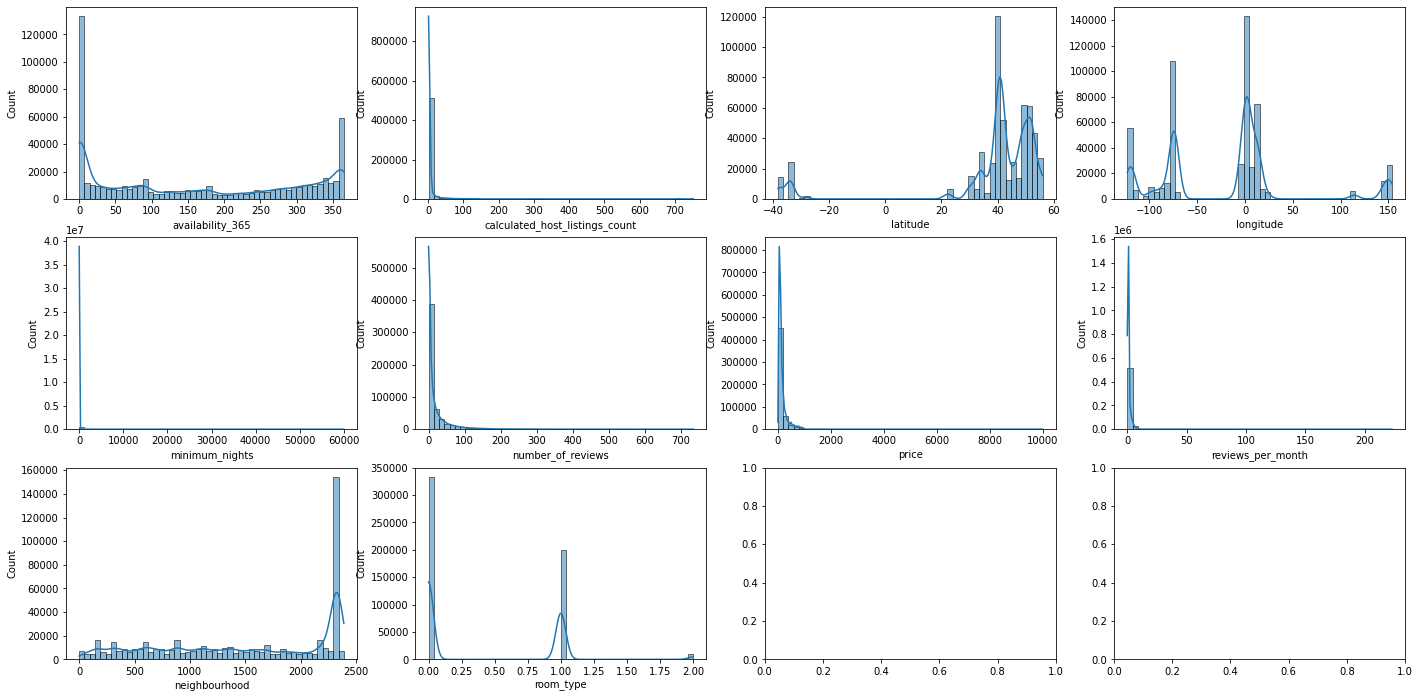

In [82]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_low_df.columns:
  if col == 'last_review':
    continue
  
  plt.subplot(3, 4, i)
  sns.histplot(airbnb_low_df[col], bins = 50, kde = True)
  i += 1

plt.show()

Nhận xét: Quan sát tổng thể các biểu đồ histogram, ta thấy các cột có dữ liệu không lệch quá nhiều mặc dù không có cột dữ liệu nào đạt dạng chuẩn. Do đó, ta sẽ không loại bỏ bất kỳ cột nào.

### Các đặc trưng nào ảnh hưởng/hữu ích đến dự đoán giá phòng? (correlation)

Ta sẽ vẽ biểu đồ scatterplot để thể hiện sự tương quan giữa cột "price" và các cột còn lại có trong dữ liệu. Với mỗi biểu đồ con sẽ có:
- Trục tung: các giá trị tương ứng có trong cột "price".
- Trục hoành: các giá trị tương ứng có trong cột dữ liệu.

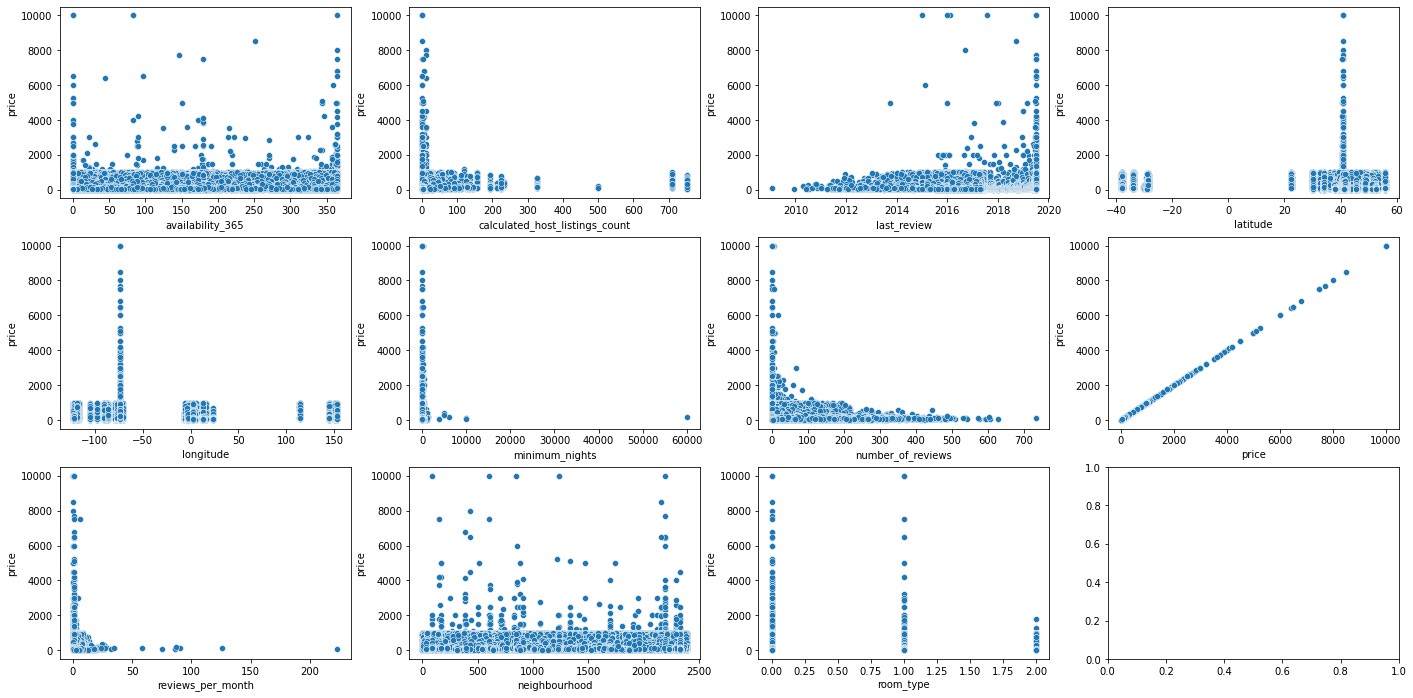

In [83]:
fig, ax = plt.subplots(3, 4, figsize = (24, 12))

i = 1
for col in airbnb_low_df.columns:
  plt.subplot(3, 4, i)
  sns.scatterplot(data = airbnb_low_df, x = col, y = 'price')
  i += 1

plt.show()

Nhận xét: Quan sát các biểu đồ scatterplot trên, ta nhận thấy: 
- Các thuộc tính không có quan hệ nhiều với "price" về dạng Linear.
- Các thuộc tính ảnh hưởng đến thuộc tính "price" dạng K-means.

Sau đó, ta sẽ sử dụng phương pháp Stepwise: Forward/Backward để chọn ra những đặc trưng phù hợp nhất sẽ sử dụng trong mô hình hồi quy.

In [84]:
def stepwise_selection(X, y, initial_list = [], threshold_in = 0.05, threshold_out = 0.05, verbose = True):
  included = list(initial_list)
  while True:
    changed = False

    # forward step
    excluded = list(set(X.columns) - set(included))
    new_pval = pd.Series(index = excluded)
    for new_column in excluded:
      model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
      new_pval[new_column] = model.pvalues[new_column]
    best_pval = new_pval.min()
    if best_pval < threshold_in:
      best_feature = new_pval.idxmin()
      included.append(best_feature)
      changed = True
      if verbose:
        print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
    
    # backward step
    model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
    # use all coefs except intercept
    pvalues = model.pvalues.iloc[:1]
    worst_pval = pvalues.max() # null if pvalues is empty
    if worst_pval > threshold_out:
      changed = True
      worst_feature = pvalues.idxmax()
      included.remove(worst_feature)
      if verbose:
        print('Drop  {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
    if not changed:
      break
  return included

X = airbnb_low_df[airbnb_low_df.columns.drop(['price', 'last_review'])]
y = airbnb_low_df['price']
result = stepwise_selection(X, y)

Add  number_of_reviews              with p-value 0.0
Add  latitude                       with p-value 0.0
Add  reviews_per_month              with p-value 1.36585e-276
Add  calculated_host_listings_count with p-value 3.60299e-189
Add  room_type                      with p-value 5.77487e-125
Add  availability_365               with p-value 7.93242e-15
Add  longitude                      with p-value 6.25353e-06


Ta sẽ giữ lại các cột sau: "latitude", "longitude", "number_of_reviews", "reviews_per_month", "price", "calculated_host_listings_count", "room_type", "availability_365", "last_review". Theo phương pháp trên cho ta các cột sau có ảnh hưởng lớn đến việc xây dựng mô hình.

In [85]:
airbnb_low_df = airbnb_low_df[['latitude', 'longitude', 'number_of_reviews', 'reviews_per_month', 'price', 'calculated_host_listings_count', 'room_type', 'last_review', 'availability_365']]

Đối với cột "price" ta sẽ tạo thêm cột "price_label" đặt làm nhãn và chia thành 2 loại: 0 (giá thấp) và 1 (giá cao).

In [86]:
airbnb_low_df['price_label'] = (airbnb_low_df['price'] >= mid_point_price).astype(int)

### Mô hình nào phù hợp để thực hiện yêu cầu dự đoán giá phòng (hồi qui, phân lớp, gom cụm)? Giải thích.

Đặc tính của tập dữ liệu là:
- Có chứa cột có dữ liệu chuỗi thời gian ("last_review") nên hoàn toàn còn cơ sở để xây dựng mô hình hồi quy ARIMA.
- Tập dữ liệu sau khi tiền xử lý có quá ít các cột dạng phân loại (categorical) nên cần phải xây dựng các mô hình gom cụm K-means và SVM để có đủ điều kiện xây dựng mô hình phân lớp.
- Việc dự đoán giá phòng không bao gồm việc dự đoán chính xác giá tiền nên có thể chuyển đổi thành nhãn và dùng mô hình phân lớp Decision Tree để thực hiện.

Do vậy, ta sẽ lần lượt thử nghiệm với từng loại mô hình đã học để tìm ra mô hình nào phù hợp nhất để dự đoán giá phòng:
- Hồi quy: ARIMA
- Gom cụm: K-means, SVM
- Phân lớp: Decision Tree

### Xây dựng mô hình dự đoán với giải pháp lựa chọn, và nêu phương pháp lựa chọn và đánh giá mô hình đã chọn?

#### 1. Mô hình hồi quy

##### a. ARIMA

---

**Tiền xử lý dữ liệu:** Xử lý dữ liệu chuỗi thời gian

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại 2 cột quan trọng cho mô hình là: "last_review" và "price" và lưu vào dataframe `airbnb_arima_df`.

In [87]:
airbnb_arima_df = airbnb_low_df[['last_review', 'price']]

Để tăng tính liên tục của thời gian, ta sẽ bổ sung các ngày còn thiếu với giá tiền mặc định là 0.

In [88]:
date_idx = pd.date_range(airbnb_arima_df['last_review'].min(), airbnb_arima_df['last_review'].max())
not_in_date_idx = date_idx[~date_idx.isin(airbnb_arima_df.index)]
airbnb_arima_df = airbnb_arima_df.append(pd.DataFrame({ 'last_review': not_in_date_idx, 'price': np.full(not_in_date_idx.size, 0)}))

Sau đó, gom nhóm các dòng có cùng tháng và năm và tính số tiền trung bình của từng tháng đó.

In [89]:
airbnb_arima_df = airbnb_arima_df.groupby(pd.Grouper(key = 'last_review', freq = 'MS')).mean()

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [90]:
airbnb_arima_df.head()

price
last_review          
2009-01-01   7.333333
2009-02-01   0.000000
2009-03-01   0.000000
2009-04-01   0.000000
2009-05-01   0.000000

---

Trước tiên, ta cần xem xét chuỗi thời gian xem nó có tính dừng hay không. Bước này có thể được thực hiện bằng cách tính hàm tự tương quan (ACF) và hàm tự tương quan riêng phần (PACF). Ta sẽ trực quan hóa bằng các biểu đồ tương quan gắn với ACF và PACF.

Nếu chuỗi thời gian không có tính dừng, lấy sai phân của nó 1 hay nhiều lần để làm cho
nó có tính dừng.


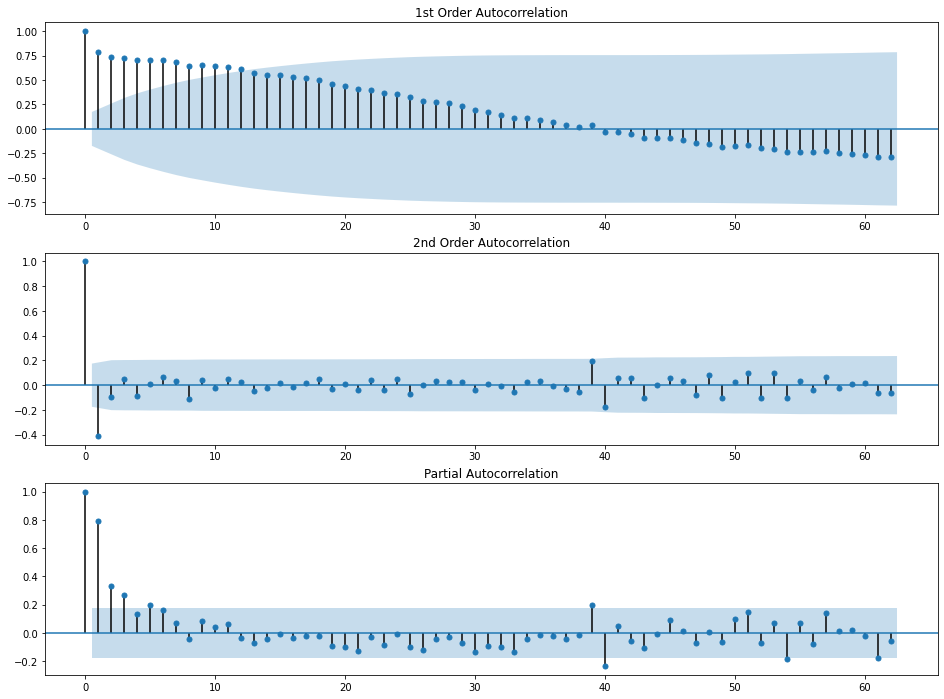

In [91]:
fig, ax = plt.subplots(3, 1, figsize = (16, 12))
fig = plot_acf(airbnb_arima_df['price'], lags = 62, ax = ax[0], title = '1st Order Autocorrelation')
fig = plot_acf(airbnb_arima_df['price'].diff().dropna(), lags = 62, ax = ax[1], title = '2nd Order Autocorrelation')
fig = plot_pacf(airbnb_arima_df['price'].dropna(), lags = 62, ax = ax[2])
plt.show()

Nhận xét: Quan sát từ 2 biểu đồ trên (ACF và PACF), lần đầu tiên của biểu đồ ACF chưa thấy xuất hiện tính dừng vì biểu đồ thay đổi giá trị liên tục từ cao xuống thấp. Do đó ta lấy đạo hàm 1 lần cho biểu đồ ACF để thấy được tính dừng. Tương tự với biểu đồ PACF ta thấy được tính dừng của chuỗi thời gian lần đầu tiên.

Từ đó có thể lựa chọn được các tham số của mô hình ARIMA(p, d, q) như sau:
- p = 2 là bậc của đồ thị AR. Xét từ độ trễ đầu tiên, thanh nào nằm ngoài đường giới hạn và sau độ giảm một cách đáng kể sau một độ trễ.
- d = 1 là bậc sai phân, trong trường hợp này sai phân cách nhau 1 tháng.
- q = 1 là bậc của đồ thị MA. Xét từ độ trễ đầu tiên, thanh nào nằm ngoài đường giới hạn và sau độ tăng một cách đáng kể sau một độ trễ.

Thực hiện xây dựng mô hình ARIMA và in ra tóm tắt kết quả chạy mô hình bằng các thông số mô tả.

In [92]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
split_point = int(airbnb_arima_df.shape[0] * 0.7)
X = airbnb_arima_df[:split_point]
y = airbnb_arima_df[split_point:]

# Xây dựng mô hình ARIMA
model = ARIMA(X, order = (2, 1, 1))
model_fit = model.fit()

# Tóm tắt kết quả mô hình
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                   87
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -381.449
Method:                       css-mle   S.D. of innovations             19.317
Date:                Fri, 30 Dec 2022   AIC                            772.899
Time:                        17:37:59   BIC                            785.228
Sample:                    02-01-2009   HQIC                           777.864
                         - 04-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6369      0.615      2.663      0.008       0.432       2.842
ar.L1.D.price    -0.1292      0.167     -0.772      0.440      -0.457       0.199
ar.L2.D.price     0.0041      0.143     

Dự đoán kết quả chạy mô hình trên tập test với 95% tin cậy.

In [93]:
# Dự đoán trên tập test với 95% tin cậy
fc, se, conf = model_fit.forecast(airbnb_arima_df.shape[0] - split_point, alpha = 0.05)

Sau đó, để so sánh giữa kết quả dự đoán từ mô hình với kết quả thực tế trên tập test, ta sẽ vẽ biểu đồ đường thể hiện kết quả dự đoán giá phòng ("price") dựa vào "last_review". Trong đó:
- Trục tung: giá phòng
- Trục hoành: ngày review cuối cùng

Các đường màu thể hiện các ý nghĩa khác nhau:
- Màu xanh dương: giá phòng của tập train.
- Màu cam: giá phòng của tập test.
- Màu xanh lá: giá phòng được dự đoán từ mô hình.

Khoảng màu xám thể hiện cận trên và cận dưới giao động trong việc dự đoán mô hình.

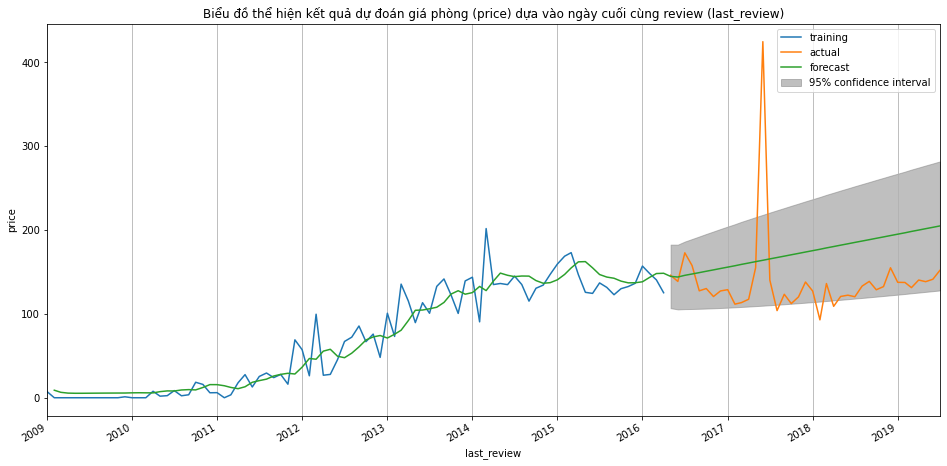

In [94]:
# Tạo Series cho biểu đồ
fc_series = pd.Series(fc, index = y.index)
lower_series = pd.Series(conf[:, 0], index = y.index)
upper_series = pd.Series(conf[:, 1], index = y.index)

# Vẽ biểu đồ trực quan hóa
fig, ax = plt.subplots(figsize = (16, 8))
plt.plot(X, label = 'training')
plt.plot(y, label = 'actual')
fig = model_fit.plot_predict(end = y.index[y.size - 1], dynamic = False, plot_insample = False, ax = ax)
plt.xlim(airbnb_arima_df.index.min(), airbnb_arima_df.index.max())
plt.title('Biểu đồ thể hiện kết quả dự đoán giá phòng (price) dựa vào ngày cuối cùng review (last_review)')
plt.xlabel('last_review')
plt.ylabel('price')
plt.legend()
plt.grid(axis = 'x')
plt.show()

Nhận xét: Quan sát biểu đồ đường ta thấy kết quả dự đoán giá phòng (forecast) có sự tương đồng so với tập dữ liệu thực tế (actual) trong 60 ngày cuối. Ngoài ra còn nhận thấy sự tăng dần của giá phòng theo từng năm chứng tỏ sự tương quan giữa "price" và "last_review" càng cao thì giá phòng càng tăng theo.

Ta sẽ đánh giá mô hình ARIMA dựa vào các độ đo 'Good-Of-Fit' cho mô hình như: ME, MAE, MPE, MAPE, MSE, RMSE, R2, ACF1.

In [95]:
def mean_error(y_test, y_pred):
  return np.mean(y_pred - y_test)
def mean_percentage_error(y_test, y_pred):
  return np.mean((y_pred - y_test) / y_test)
def root_mean_squared_error(y_test, y_pred):
  return sqrt(mean_squared_error(y_test, y_pred))
y_test = airbnb_arima_df[split_point:]['price'].values
y_pred = fc_series.values

# The mean error
print('Mean error (ME):                           %.4f' % mean_error(y_test, y_pred))
# The mean absolute error
print('Mean absolute error (MAE):                 %.4f' % mean_absolute_error(y_test, y_pred))
# The mean percentage error
print('Mean percentage error (MPE):               %.4f' % mean_percentage_error(y_test, y_pred))
# The mean absolute percentage error
print('Mean absolute percentage error (MAPE):     %.4f' % mean_absolute_percentage_error(y_test, y_pred))
# The mean squared error
print('Mean squared error (MSE):                  %.4f' % mean_squared_error(y_test, y_pred))
# The root mean squared error
print('Root mean squared error (RMSE):            %.4f' % root_mean_squared_error(y_test, y_pred))
# The R squared
print('R-Square (R2):                             %.4f' % r2_score(y_test, y_pred))
# The autocorrelation of errors at lag 1
print('Autocorrelation of errors at lag 1 (ACF1): %.4f' % acf(fc - y_test)[1])

Mean error (ME):                           35.1861
Mean absolute error (MAE):                 50.5175
Mean percentage error (MPE):               0.3219
Mean absolute percentage error (MAPE):     0.3651
Mean squared error (MSE):                  4096.7901
Root mean squared error (RMSE):            64.0062
R-Square (R2):                             -0.7125
Autocorrelation of errors at lag 1 (ACF1): 0.2516


In [96]:
# Accuracy
accuracy_arima_low = (1 - mean_absolute_percentage_error(y_test, y_pred)) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_arima_low}')

Mô hình dự đoán với độ chính xác là: 63.48786733641787


Nhận xét: Mô hình ARIMA dự đoán giá phòng dựa vào ngày cuối cùng review và cho ra kết quả với độ chính xác khá thấp **(~63.49%)** so với kỳ vọng vì có tỉ lệ % độ lỗi trung bình tuyệt đối cao và mô hình đòi hỏi phải dự đoán gần đúng với kết quả thực tế thay vì dự đoán nhãn cho tập dữ liệu.

#### 2. Mô hình gom cụm

##### a. K-means

---

**Tiền xử lý dữ liệu:** Chuẩn hóa dữ liệu

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "latitude", "longitude", "price_label" và lưu vào dataframe `airbnb_kmeans_df`.

In [97]:
airbnb_kmeans_df = airbnb_low_df[['latitude', 'longitude', 'price_label']]

Sau đó, ta sẽ chuẩn hóa dữ liệu theo kiểu min-max để ước tính chia tỉ lệ của từng cột riêng lẻ sao cho nó nằm trong khoảng từ 0 đến 1.

In [98]:
scaler = MinMaxScaler()
new_airbnb_kmeans_data = scaler.fit_transform(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])])
airbnb_kmeans_df = pd.DataFrame(new_airbnb_kmeans_data, columns = airbnb_kmeans_df.columns.drop(['price_label']))
airbnb_kmeans_df['price_label'] = airbnb_low_df['price_label'].values

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [99]:
airbnb_kmeans_df.head()

latitude  longitude  price_label
0  0.837108   0.177877            0
1  0.838235   0.177836            1
2  0.838823   0.177988            1
3  0.837508   0.177923            0
4  0.838711   0.177980            0

---

Đầu tiên, ta sử dụng phương pháp Elbow để tìm k (số cluster) phù hợp nhất để xây dựng mô hình.

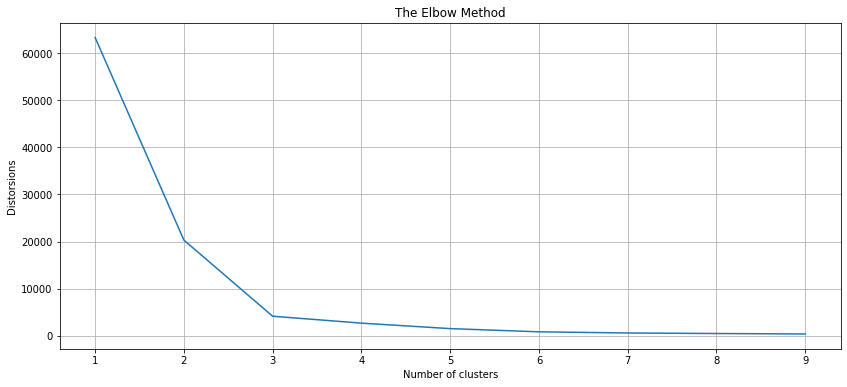

In [100]:
distorsions = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])])
    distorsions.append(kmeans.inertia_)
plt.figure(figsize = (14, 6))
plt.plot(range(1, 10), distorsions)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distorsions')
plt.grid()
plt.show()

Nhận xét: Theo biểu đồ trên, chúng ta có thể thấy một đường gấp khúc tại **k = 2**. Do đó **k = 2** có thể được xem là 1 giá trị tốt của mô hình K-means để gom cụm dữ liệu.

Thực hiện xây dựng mô hình K-means và tìm các điểm trung tâm gom cụm.

In [101]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
X = airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['price_label'])]
y = airbnb_kmeans_df['price_label']

# Xây dựng mô hình K-means
model = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model_fit = model.fit(X)

# Gán cụm cho tập dữ liệu
airbnb_kmeans_df['cluster'] = model.labels_

# Tìm các điểm trung tâm gom cụm
print('Cluster centers:')
print(model.cluster_centers_)

Cluster centers:
[[0.8748895  0.32216102]
 [0.03468948 0.98384246]]


Để dễ trực quan hơn, ta sẽ vẽ biểu đồ scatterplot để thể hiện các gom cụm của dữ liệu. Trong đó:
- Trục tung: kinh độ
- Trục hoành: vĩ độ

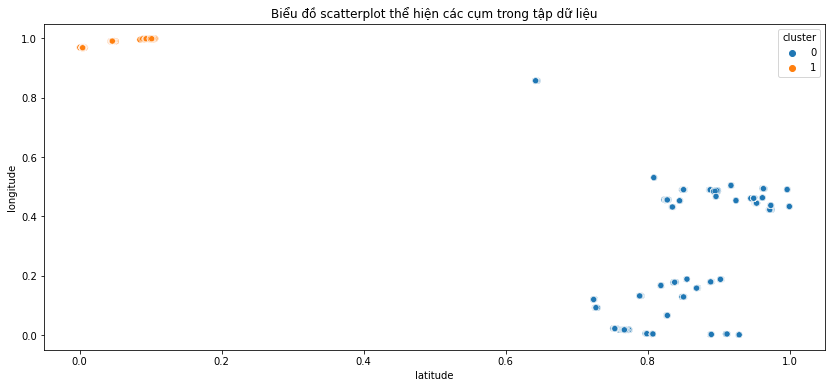

In [102]:
# Giảm chiều dữ liệu
# pca = PCA(n_components = 2)
# pca_df = pd.DataFrame(pca.fit_transform(airbnb_kmeans_df[airbnb_kmeans_df.columns.drop(['cluster'])]), columns = ['component 1', 'component 2'])
# pca_df['cluster'] = airbnb_kmeans_df['cluster']

# Vẽ biểu đồ trực quan hóa
plt.figure(figsize = (14, 6))
sns.scatterplot(data = airbnb_kmeans_df, x = 'latitude', y = 'longitude', hue = 'cluster').set_title('Biểu đồ scatterplot thể hiện các cụm trong tập dữ liệu')
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta có thể thấy các cụm dữ liệu được chia thành 2 cụm riêng biệt:
- Cụm 0: Nằm ở phía bên phải.
- Cụm 1: Nằm ở phía bên trái.

Ta sẽ đánh giá mô hình K-means dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.7150
Precision:   0.3778
Recall:      0.1060
F-score:     0.1655
Confusion Matrix:


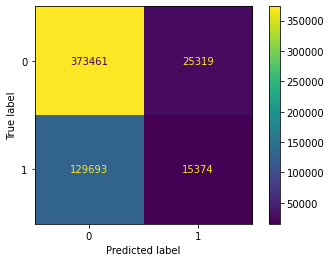

In [103]:
def plot_confusion_matrix(y_test, y_pred):
  disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.show()
y_test = airbnb_kmeans_df['price_label'].values
y_pred = airbnb_kmeans_df['cluster'].values

# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [104]:
# Accuracy
accuracy_kmeans_low = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_kmeans_low}')

Mô hình dự đoán với độ chính xác là: 71.49713062681232


Nhận xét: Mô hình K-means dự đoán giá phòng dựa vào vị trí của căn phòng dịch vụ với độ chính xác khá cao **(~71.5%)**, tuy nhiên với các mô hình gom cụm ta chỉ biết được giá phòng theo nhãn ("price_label") mà không biết được chính xác được cụ thể giá phòng.

##### b. SVM

---

**Tiền xử lý dữ liệu:** Loại bỏ các cột không cần thiết

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "number_of_reviews", "reviews_per_month", "price" và lưu vào dataframe `airbnb_svm_df`.

In [105]:
airbnb_svm_df = airbnb_low_df[['number_of_reviews', 'reviews_per_month', 'price_label']]

Sau đó, ta sẽ chuẩn hóa dữ liệu của 2 cột "number_of_reviews" và "reviews_per_month" theo kiểu z-score để ước tính chia tỉ lệ của từng cột riêng lẻ sao cho các giá trị có mean = 0.

In [106]:
scaler = StandardScaler()
new_airbnb_svm_data = scaler.fit_transform(airbnb_svm_df[airbnb_svm_df.columns.drop(['price_label'])])
airbnb_svm_df = pd.DataFrame(new_airbnb_svm_data, columns = airbnb_svm_df.columns.drop(['price_label']))
airbnb_svm_df['price_label'] = airbnb_low_df['price_label'].values

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [107]:
airbnb_svm_df.head()

number_of_reviews  reviews_per_month  price_label
0          -0.247359          -0.755328            0
1           0.821884          -0.643232            1
2          -0.514670          -0.234409            1
3           7.504655           2.165776            0
4          -0.247359          -0.827861            0

---

Thực hiện xây dựng mô hình SVM với 10000 dòng dữ liệu đầu tiên vì việc tính toán chi phí thời gian để xây dựng mô hình này khá tốn kém nên ta phải giảm kích thước của tập dữ liệu.

In [108]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
X = airbnb_svm_df.iloc[:10000, [0, 1]].values
y = airbnb_svm_df.iloc[:10000, 2].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Xây dựng mô hình SVM
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

Dự đoán kết quả chạy mô hình trên tập test.

In [109]:
# Dự đoán dữ liệu trên tập test
y_pred = model.predict(X_test)

Để dễ trực quan hơn, ta sẽ vẽ biểu đồ scatterplot thể hiện 2 cụm chính trong tập dữ liệu. Trong đó:
- Chấm màu đen và chấm màu hồng thể hiện các điểm trước gom cụm
- Vùng màu đỏ và vùng màu xanh thể hiện các điểm sau gom cụm

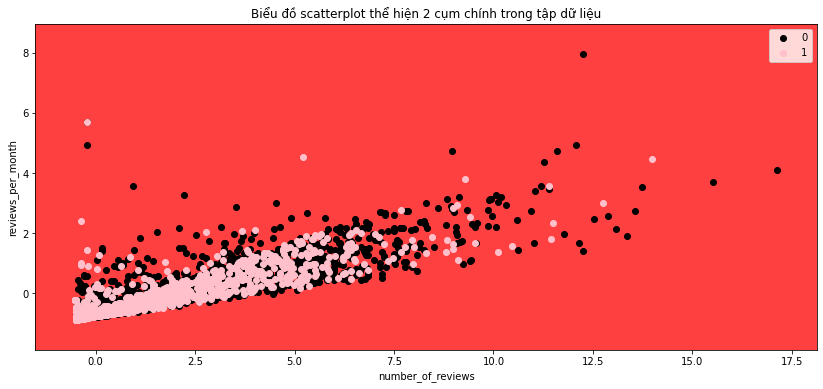

In [110]:
# Vẽ biểu đồ trực quan hóa
X_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), \
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (14, 6))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('black', 'pink'))(i), label = j)
plt.title('Biểu đồ scatterplot thể hiện 2 cụm chính trong tập dữ liệu')
plt.xlabel('number_of_reviews')
plt.ylabel('reviews_per_month')
plt.legend()
plt.show()

Nhận xét: Quan sát biểu đồ trên, ta không thấy vùng màu xanh xuất hiện cũng như chỉ thấy mỗi vùng màu đó. Điều đó cho thấy tất cả các điểm ban đầu đã thuộc cùng một cụm.

Ta sẽ đánh giá mô hình SVM dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.6143
Precision:   0.0000
Recall:      0.0000
F-score:     0.0000
Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


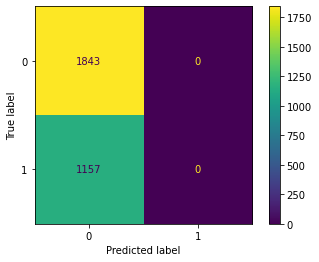

In [111]:
# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [112]:
# Accuracy
accuracy_svm_low = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_svm_low}')

Mô hình dự đoán với độ chính xác là: 61.43333333333333


Nhận xét: Cũng tương tự như mô hình K-means, mô hình SVM dự đoán giá phòng dựa vào số lượt review với độ chính xác trung bình **(~61.43%)**, và cũng giống như các mô hình gom cụm khác, ta chỉ biết được giá phòng theo nhãn ("price_label") mà không biết được chính xác được cụ thể giá phòng. Nếu so với cùng mô hình gom cụm là K-means thì mô hình SVM không dự đoán tốt bằng do có tỉ lệ % chính xác thấp hơn mô hình K-means.

#### 4. Mô hình phân lớp

##### a. Decision Tree

---

**Tiền xử lý dữ liệu:** Loại bỏ các cột không cần thiết

Trước tiên, ta sẽ loại bỏ một số cột không cần thiết và chỉ giữ lại các cột quan trọng cho mô hình là: "room_type", "cluster", "price_label" và lưu vào dataframe `airbnb_decision_tree_df`.

In [113]:
airbnb_decision_tree_df = airbnb_low_df[['room_type', 'price_label']]
airbnb_decision_tree_df['cluster'] = airbnb_kmeans_df['cluster']

Xem thử tập dữ liệu sau khi đã tiền xử lý.

In [114]:
airbnb_decision_tree_df.head()

room_type  price_label  cluster
0          1            0        0
1          0            1        0
2          1            1        0
3          0            0        0
4          0            0        0

---

Thực hiện xây dựng mô hình Decision Tree.

In [115]:
# Chia thành 2 tập train và test với tỉ lệ 70/30
feature_cols = airbnb_decision_tree_df.columns.drop(['price_label'])
X = airbnb_decision_tree_df[feature_cols]
y = airbnb_decision_tree_df['price_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Xây dựng mô hình Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Dự đoán kết quả chạy mô hình trên tập test.

In [116]:
# Dự đoán dữ liệu trên tập test
y_pred = clf.predict(X_test)

Ta sẽ trực quan hóa mô hình bằng cây quyết định để thấy được các nhánh cũng như sự phân lớp của cây.

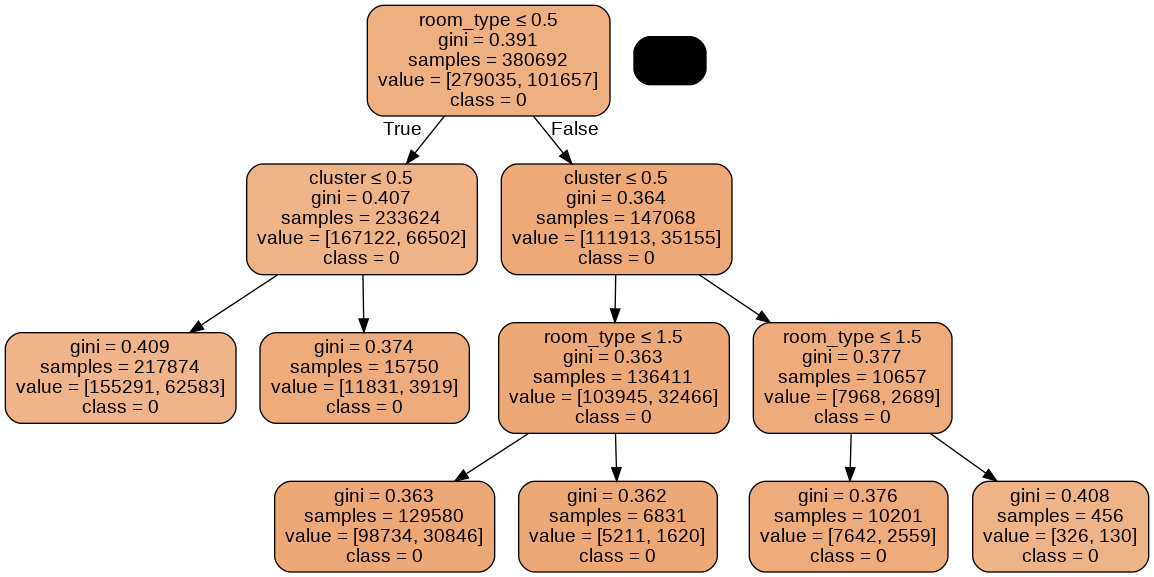

In [117]:
# Vẽ biểu đồ trực quan hóa
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = feature_cols, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

Ta sẽ đánh giá mô hình Decision Tree dựa vào các độ đo cho mô hình như: Confusion Matrix, Accuracy, Precision, Recall, F-score

Accuracy:    0.7339
Precision:   0.0000
Recall:      0.0000
F-score:     0.0000
Confusion Matrix:


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


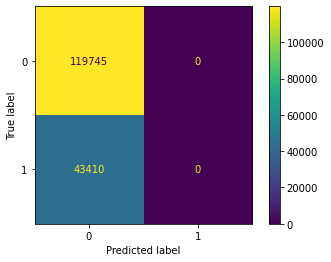

In [118]:
# Accuracy
print('Accuracy:    %.4f' % accuracy_score(y_test, y_pred))
# Precision
print('Precision:   %.4f' % precision_score(y_test, y_pred))
# Recall
print('Recall:      %.4f' % recall_score(y_test, y_pred))
# F-score
print('F-score:     %.4f' % f1_score(y_test, y_pred))
# Confusion matrix
print('Confusion Matrix:')
plot_confusion_matrix(y_test, y_pred)

In [119]:
# Accuracy
accuracy_decision_tree_low = accuracy_score(y_test, y_pred) * 100
print(f'Mô hình dự đoán với độ chính xác là: {accuracy_decision_tree_low}')

Mô hình dự đoán với độ chính xác là: 73.39339891514204


Nhận xét: Mô hình Decision Tree dự đoán giá phòng dựa vào loại phòng và phân cụm với độ chính xác khá cao **(~73.4%)**, tuy nhiên với các mô hình phân lớp ta chỉ dự đoán được đúng nhãn của giá và do dữ liệu không có nhiều cột dạng phân loại nên việc sử dụng mô hình Decision Tree vào tập dữ liệu này mang tính chủ quan.

# D. ĐÁNH GIÁ MÔ HÌNH

### Dự đoán lần lượt với hai cách xử lý giá ở trên thì cái nào cho kết quả tốt hơn?

Với 2 cách xử lý ở trên. Ta sẽ so sánh độ chính xác (accuracy) của từng mô hình với từng cách xử lý giá mà ta đã tính ở trên. Sau đó lưu lại vào dataframe `statistic_model_df`.

In [120]:
accuracy_dict = { 'High price': [accuracy_arima_high, accuracy_kmeans_high, accuracy_svm_high, accuracy_decision_tree_high],
                  'Low price': [accuracy_arima_low, accuracy_kmeans_low, accuracy_svm_low, accuracy_decision_tree_low] }
statistic_model_df = pd.DataFrame(accuracy_dict, index = ['ARIMA', 'K-means', 'SVM (1000)', 'Decision Tree'])
statistic_model_df

High price  Low price
ARIMA           62.823754  63.487867
K-means         70.208349  71.497131
SVM (1000)      61.433333  61.433333
Decision Tree   71.900340  73.393399

Nhận xét: Ta đều thấy với từng mô hình học máy như ARIMA, K-means, SVM, Decision Tree đều cho ta tỉ lệ chính xác theo cách xử lý giá thấp thì cao hơn giá cao mặc dù không chêch lệch nhiều. Điều đó cho thấy cách xử lý missing value bằng giá thấp sẽ có hiệu quả tốt hơn so với cách xử lý missing value bằng giá cao. Ngoài ra, cũng tùy tình huống sử dụng và nhu cầu của người dùng mà ta lựa chọn mô hình phù hợp. Cụ thể:
- Nếu muốn tăng tính chính xác một con số cụ thể và dự đoán giá phòng trong tương lai thì nên dùng mô hình ARIMA mặc dù có độ chính xác không cao.
- Nếu muốn nhận diện nhãn hoặc phân biệt giá cao và giá thấp thì nên dùng mô hình K-means hay Decision Tree vì có độ chính xác khá cao.